In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import vtk 
from vtk.util import numpy_support as VN
import matplotlib.tri as tri

2023-10-25 16:19:39.235274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 16:19:40.249915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
path = ["./CNN Data/M1/150_Z_0.03125", 
        "./CNN Data/M1/151_Z_0.03125",
        "./CNN Data/M1/152_Z_0.03125",
        "./CNN Data/M1/153_Z_0.03125",
        "./CNN Data/M1/154_Z_0.03125",
        "./CNN Data/M1/155_Z_0.03125",
        "./CNN Data/M1/156_Z_0.03125",
        "./CNN Data/M1/157_Z_0.03125",
        "./CNN Data/M1/158_Z_0.03125",
        "./CNN Data/M1/159_Z_0.03125",
        "./CNN Data/M1/160_Z_0.03125",
        "./CNN Data/M1/150_Z_N0.03125",
        "./CNN Data/M1/151_Z_N0.03125",
        "./CNN Data/M1/152_Z_N0.03125",
        "./CNN Data/M1/153_Z_N0.03125",
        "./CNN Data/M1/154_Z_N0.03125",
        "./CNN Data/M1/155_Z_N0.03125",
        "./CNN Data/M1/156_Z_N0.03125",
        "./CNN Data/M1/157_Z_N0.03125",
        "./CNN Data/M1/158_Z_N0.03125",
        "./CNN Data/M1/159_Z_N0.03125",
        "./CNN Data/M1/160_Z_N0.03125",
        "./CNN Data/M1/161_Z_N0.03125",
        "./CNN Data/M1/162_Z_N0.03125",
        "./CNN Data/M1/163_Z_N0.03125",
        "./CNN Data/M1/164_Z_N0.03125",
        "./CNN Data/M1/165_Z_N0.03125",
        "./CNN Data/M1/166_Z_N0.03125",
        "./CNN Data/M1/167_Z_N0.03125",
        "./CNN Data/M1/168_Z_N0.03125",
        "./CNN Data/M1/169_Z_N0.03125",
        "./CNN Data/M1/170_Z_N0.03125",
        "./CNN Data/M1/150_Z_0.09375",
        "./CNN Data/M1/151_Z_0.09375",
        "./CNN Data/M1/152_Z_0.09375",
        "./CNN Data/M1/153_Z_0.09375",
        "./CNN Data/M1/154_Z_0.09375",
        "./CNN Data/M1/155_Z_0.09375",
        "./CNN Data/M1/156_Z_0.09375",
        "./CNN Data/M1/157_Z_0.09375",
        "./CNN Data/M1/158_Z_0.09375",
        "./CNN Data/M1/159_Z_0.09375",
        "./CNN Data/M1/160_Z_0.09375",
        "./CNN Data/M1/161_Z_0.09375",
        "./CNN Data/M1/162_Z_0.09375",
        "./CNN Data/M1/163_Z_0.09375",
        "./CNN Data/M1/164_Z_0.09375",
        "./CNN Data/M1/165_Z_0.09375",
        "./CNN Data/M1/166_Z_0.09375",
        "./CNN Data/M1/167_Z_0.09375",
        "./CNN Data/M1/168_Z_0.09375",
        "./CNN Data/M1/169_Z_0.09375",
        "./CNN Data/M1/170_Z_0.09375",
        "./CNN Data/M1/150_Z_N0.09375",
        "./CNN Data/M1/151_Z_N0.09375",
        "./CNN Data/M1/152_Z_N0.09375",
        "./CNN Data/M1/153_Z_N0.09375",
        "./CNN Data/M1/154_Z_N0.09375",
        "./CNN Data/M1/155_Z_N0.09375",
        "./CNN Data/M1/156_Z_N0.09375",
        "./CNN Data/M1/157_Z_N0.09375",
        "./CNN Data/M1/158_Z_N0.09375",
        "./CNN Data/M1/159_Z_N0.09375",
        "./CNN Data/M1/160_Z_N0.09375",
        "./CNN Data/M1/161_Z_N0.09375",
        "./CNN Data/M1/162_Z_N0.09375",
        "./CNN Data/M1/163_Z_N0.09375",
        "./CNN Data/M1/164_Z_N0.09375",
        "./CNN Data/M1/165_Z_N0.09375",
        "./CNN Data/M1/166_Z_N0.09375",
        "./CNN Data/M1/167_Z_N0.09375",
        "./CNN Data/M1/168_Z_N0.09375",
        "./CNN Data/M1/169_Z_N0.09375",
        "./CNN Data/M1/170_Z_N0.09375",
        "./CNN Data/M1/150_Z_0.15625",
        "./CNN Data/M1/151_Z_0.15625",
        "./CNN Data/M1/152_Z_0.15625",
        "./CNN Data/M1/153_Z_0.15625",
        "./CNN Data/M1/154_Z_0.15625",
        "./CNN Data/M1/155_Z_0.15625",
        "./CNN Data/M1/156_Z_0.15625",
        "./CNN Data/M1/157_Z_0.15625",
        "./CNN Data/M1/158_Z_0.15625",
        "./CNN Data/M1/159_Z_0.15625",
        "./CNN Data/M1/160_Z_0.15625",
        "./CNN Data/M1/161_Z_0.15625",
        "./CNN Data/M1/162_Z_0.15625",
        "./CNN Data/M1/163_Z_0.15625",
        "./CNN Data/M1/164_Z_0.15625",
        "./CNN Data/M1/165_Z_0.15625",
        "./CNN Data/M1/166_Z_0.15625",
        "./CNN Data/M1/167_Z_0.15625",
        "./CNN Data/M1/168_Z_0.15625",
        "./CNN Data/M1/169_Z_0.15625",
        "./CNN Data/M1/170_Z_0.15625",
        "./CNN Data/M1/150_Z_N0.15625",
        "./CNN Data/M1/151_Z_N0.15625",
        "./CNN Data/M1/152_Z_N0.15625",
        "./CNN Data/M1/153_Z_N0.15625",
        "./CNN Data/M1/154_Z_N0.15625",
        "./CNN Data/M1/155_Z_N0.15625",
        "./CNN Data/M1/156_Z_N0.15625",
        "./CNN Data/M1/157_Z_N0.15625",
        "./CNN Data/M1/158_Z_N0.15625",
        "./CNN Data/M1/159_Z_N0.15625",
        "./CNN Data/M1/160_Z_N0.15625",
        "./CNN Data/M1/161_Z_N0.15625",
        "./CNN Data/M1/162_Z_N0.15625",
        "./CNN Data/M1/163_Z_N0.15625",
        "./CNN Data/M1/164_Z_N0.15625",
        "./CNN Data/M1/165_Z_N0.15625",
        "./CNN Data/M1/166_Z_N0.15625",
        "./CNN Data/M1/167_Z_N0.15625",
        "./CNN Data/M1/168_Z_N0.15625",
        "./CNN Data/M1/169_Z_N0.15625",
        "./CNN Data/M1/170_Z_N0.15625"]

nt = len(path)
nx = 256
ny = 128
nc = 10
nf = 9
nl = 1

In [4]:
nt

116

In [5]:
testPath = ['./CNN Data/M1/150_Z_0.21875',
            './CNN Data/M1/151_Z_0.21875',
            './CNN Data/M1/152_Z_0.21875',
            './CNN Data/M1/153_Z_0.21875',
            './CNN Data/M1/154_Z_0.21875',
            './CNN Data/M1/155_Z_0.21875',
            './CNN Data/M1/156_Z_0.21875',
            './CNN Data/M1/157_Z_0.21875',
            './CNN Data/M1/158_Z_0.21875',
            './CNN Data/M1/159_Z_0.21875',
            './CNN Data/M1/160_Z_0.21875',
            './CNN Data/M1/161_Z_0.21875',
            './CNN Data/M1/162_Z_0.21875',
            './CNN Data/M1/163_Z_0.21875',
            './CNN Data/M1/164_Z_0.21875',
            './CNN Data/M1/165_Z_0.21875',
            './CNN Data/M1/166_Z_0.21875',
            './CNN Data/M1/167_Z_0.21875',
            './CNN Data/M1/168_Z_0.21875',
            './CNN Data/M1/169_Z_0.21875',
            './CNN Data/M1/170_Z_0.21875']
nt_test = len(testPath)

In [6]:
data = np.zeros([nt, nx, ny, nc])

for t in range(nt):
    with open(path[t], "r") as f:
        f.readline()
        for j in range(ny):
            l = f.readline().split('\t')
            for i in range(nx):
                for c in range(nc):
                    data[t, i, j, c] = l[i*nc+c]

In [7]:
data_test = np.zeros([nt_test, nx, ny, nc])

for t in range(nt_test):
    with open(testPath[t], "r") as f:
        f.readline()
        for j in range(ny):
            l = f.readline().split('\t')
            for i in range(nx):
                for c in range(nc):
                    data_test[t, i, j, c] = l[i*nc+c]

In [36]:
np.random.shuffle(data)

In [9]:
feats = np.zeros([nt, nx, ny, nf])
label = np.zeros([nt, nx, ny, nl])

for t in range(nt):
    for j in range(ny):
        for i in range(nx):
            for c in range(nc):
                if c<(nc-1):
                    feats[t, i, j, c] = data[t, i, j, c]
                else:
                    label[t, i, j, 0] = data[t, i, j,-1]   

In [10]:
feats_test = np.zeros([nt_test, nx, ny, nf])
label_test = np.zeros([nt_test, nx, ny, nl])

for t in range(nt_test):
    for j in range(ny):
        for i in range(nx):
            for c in range(nc):
                if c<(nc-1):
                    feats_test[t, i, j, c] = data_test[t, i, j, c]
                else:
                    label_test[t, i, j, 0] = data_test[t, i, j,-1]   

In [11]:
split = int(0.8 * nt)
x_train = feats[0:split,:,:,:]
y_train = label[0:split,:,:,:]

x_val = feats[split+1:,:,:,:]
y_val = label[split+1:,:,:,:]

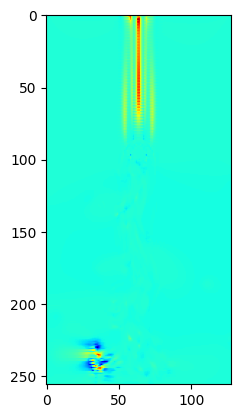

In [12]:
plt.imshow(label[1,:,:,0], cmap='jet')

In [13]:
print("Reading data:")
for i in range(nc):
    print(data[0, -1,-1,i])   
         
print("\nReading feats and label:")
for i in range(nc-1):
    print(feats[0, -1,-1,i])    
print(label[0, -1,-1,0])

Reading data:
1.00537
1.14371e-05
0.000575954
7.44875e-06
-1.93385e-08
-3.60196e-06
4.12883e-09
-5.16638e-08
5.93818e-06
-0.000282799

Reading feats and label:
1.00537
1.14371e-05
0.000575954
7.44875e-06
-1.93385e-08
-3.60196e-06
4.12883e-09
-5.16638e-08
5.93818e-06
-0.000282799


In [47]:
def CC(true, pred):
    true = tf.cast(true, tf.float32)
    pred = tf.cast(pred, tf.float32)
    cov = K.sum( (true - K.mean(true)) * (pred - K.mean(pred)) ) / ( len(true) - 1 )
    sigma = lambda y : np.sqrt(K.mean(K.square(y - K.mean(y))))
    return cov / ( sigma(true) * sigma(pred) )

In [14]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
def Model(Nn, Nx, Ny, Nf, Nl, Nly):
    de = [1, 2, 4, 8, 16]
    model = tf.keras.models.Sequential()
    input_layer = tf.keras.layers.Input(shape=(nx, ny, nf))
    x = tf.keras.layers.Conv2D(int(Nn/de[0]), (3,3), activation='relu', padding='same')(input_layer)
    x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly):
        x = tf.keras.layers.Conv2D(int(Nn/de[i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly+1):
        x = tf.keras.layers.Conv2D(int(Nn/de[Nly-i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.UpSampling2D((2,2))(x)
    output_layer = tf.keras.layers.Conv2D(nl, (3,3), activation='linear', padding='same')(x)
    
    model = tf.keras.models.Model(input_layer, output_layer)
    adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, 
                                           beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])
    model._name = f'model_n_{Nn}_lay_{Nly}'
    
    return model

In [22]:
neuron = 256 #[32, 64, 128, 256]
layer = 5 #[2, 3, 4, 5]
checkpoints = tf.keras.callbacks.ModelCheckpoint(filepath='CNN_checkpoints/M1_weight-{epoch:02d}.h5', 
                                                  monitor='val_loss', 
                                                  verbose=1, 
                                                  save_best_only=True, 
                                                  mode='min')
model = Model(neuron, nx, ny, nf, nl, layer)
model.summary()
history_callback = model.fit(x_train, y_train, epochs=5000, batch_size=16, 
                            validation_data=[x_val, y_val], validation_batch_size=4, 
                            callbacks=[checkpoints])

2023-10-09 17:51:13.275570: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38112 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


Model: "model_n_256_lay_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 128, 9)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 128, 256)     20992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 64, 256)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 64, 128)      295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 32, 64)  

2023-10-09 17:51:15.953161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-10-09 17:51:16.354483: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-09 17:51:16.355149: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-09 17:51:16.355168: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-10-09 17:51:16.355434: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-09 17:51:16.355476: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:317] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

6/6 [==============================] - ETA: 0s - loss: 0.0127 - coeff_determination: -0.0839
Epoch 1: val_loss improved from inf to 0.01172, saving model to CNN_checkpoints/M1_weight-01.h5
6/6 [==============================] - 8s 458ms/step - loss: 0.0127 - coeff_determination: -0.0839 - val_loss: 0.0117 - val_coeff_determination: -0.0193
Epoch 2/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0120 - coeff_determination: -0.0039
Epoch 2: val_loss improved from 0.01172 to 0.01108, saving model to CNN_checkpoints/M1_weight-02.h5
6/6 [==============================] - 0s 52ms/step - loss: 0.0119 - coeff_determination: -3.7949e-04 - val_loss: 0.0111 - val_coeff_determination: 0.0370
Epoch 3/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0103 - coeff_determination: 0.0879
Epoch 3: val_loss improved from 0.01108 to 0.00896, saving model to CNN_checkpoints/M1_weight-03.h5
6/6 [==============================] - 0s 55ms/step - loss: 0.0105 - coeff_determination: 0.

6/6 [==============================] - 0s 55ms/step - loss: 0.0025 - coeff_determination: 0.7915 - val_loss: 0.0023 - val_coeff_determination: 0.7926
Epoch 26/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7806
Epoch 26: val_loss did not improve from 0.00234
6/6 [==============================] - 0s 38ms/step - loss: 0.0025 - coeff_determination: 0.7874 - val_loss: 0.0023 - val_coeff_determination: 0.7872
Epoch 27/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.8004
Epoch 27: val_loss improved from 0.00234 to 0.00232, saving model to CNN_checkpoints/M1_weight-27.h5
6/6 [==============================] - 0s 68ms/step - loss: 0.0024 - coeff_determination: 0.7993 - val_loss: 0.0023 - val_coeff_determination: 0.7908
Epoch 28/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7951
Epoch 28: val_loss improved from 0.00232 to 0.00232, saving model to CNN_checkpoint

Epoch 51/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8727
Epoch 51: val_loss improved from 0.00157 to 0.00155, saving model to CNN_checkpoints/M1_weight-51.h5
6/6 [==============================] - 0s 51ms/step - loss: 0.0016 - coeff_determination: 0.8638 - val_loss: 0.0016 - val_coeff_determination: 0.8642
Epoch 52/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8659
Epoch 52: val_loss improved from 0.00155 to 0.00153, saving model to CNN_checkpoints/M1_weight-52.h5
6/6 [==============================] - 0s 53ms/step - loss: 0.0016 - coeff_determination: 0.8668 - val_loss: 0.0015 - val_coeff_determination: 0.8625
Epoch 53/5000
5/6 [========================>.....] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8734
Epoch 53: val_loss improved from 0.00153 to 0.00141, saving model to CNN_checkpoints/M1_weight-53.h5
6/6 [==============================] - 0s 48ms/step - loss: 0.0015 - coeff_dete

Epoch 74/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1100e-04 - coeff_determination: 0.9827
Epoch 74: val_loss did not improve from 0.00027
6/6 [==============================] - 0s 38ms/step - loss: 2.0941e-04 - coeff_determination: 0.9814 - val_loss: 2.7689e-04 - val_coeff_determination: 0.9755
Epoch 75/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1667e-04 - coeff_determination: 0.9821
Epoch 75: val_loss improved from 0.00027 to 0.00026, saving model to CNN_checkpoints/M1_weight-75.h5
6/6 [==============================] - 0s 51ms/step - loss: 2.0750e-04 - coeff_determination: 0.9826 - val_loss: 2.5592e-04 - val_coeff_determination: 0.9773
Epoch 76/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0492e-04 - coeff_determination: 0.9821
Epoch 76: val_loss improved from 0.00026 to 0.00025, saving model to CNN_checkpoints/M1_weight-76.h5
6/6 [==============================] - 0s 56ms/step - loss: 2.0334e-04 - coeff_determination: 0.9828 - v

Epoch 98/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6086e-04 - coeff_determination: 0.9854
Epoch 98: val_loss improved from 0.00021 to 0.00021, saving model to CNN_checkpoints/M1_weight-98.h5
6/6 [==============================] - 0s 61ms/step - loss: 1.5978e-04 - coeff_determination: 0.9860 - val_loss: 2.1008e-04 - val_coeff_determination: 0.9814
Epoch 99/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5959e-04 - coeff_determination: 0.9858
Epoch 99: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 39ms/step - loss: 1.5717e-04 - coeff_determination: 0.9863 - val_loss: 2.2690e-04 - val_coeff_determination: 0.9799
Epoch 100/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6576e-04 - coeff_determination: 0.9859
Epoch 100: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 38ms/step - loss: 1.5876e-04 - coeff_determination: 0.9863 - val_loss: 2.1985e-04 - val_coeff_determination: 0.98

5/6 [========================>.....] - ETA: 0s - loss: 1.0659e-04 - coeff_determination: 0.9908
Epoch 146: val_loss did not improve from 0.00017
6/6 [==============================] - 0s 38ms/step - loss: 1.1203e-04 - coeff_determination: 0.9902 - val_loss: 1.7397e-04 - val_coeff_determination: 0.9846
Epoch 147/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0392e-04 - coeff_determination: 0.9913
Epoch 147: val_loss improved from 0.00017 to 0.00017, saving model to CNN_checkpoints/M1_weight-147.h5
6/6 [==============================] - 0s 69ms/step - loss: 1.0911e-04 - coeff_determination: 0.9905 - val_loss: 1.7014e-04 - val_coeff_determination: 0.9850
Epoch 148/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1243e-04 - coeff_determination: 0.9906
Epoch 148: val_loss did not improve from 0.00017
6/6 [==============================] - 0s 38ms/step - loss: 1.1069e-04 - coeff_determination: 0.9904 - val_loss: 1.7943e-04 - val_coeff_determination: 0.9842
Epoch 1

Epoch 171/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0003e-04 - coeff_determination: 0.9916
Epoch 171: val_loss improved from 0.00016 to 0.00016, saving model to CNN_checkpoints/M1_weight-171.h5
6/6 [==============================] - 0s 49ms/step - loss: 9.8699e-05 - coeff_determination: 0.9916 - val_loss: 1.6180e-04 - val_coeff_determination: 0.9857
Epoch 172/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.4695e-05 - coeff_determination: 0.9917
Epoch 172: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 9.7756e-05 - coeff_determination: 0.9912 - val_loss: 1.6210e-04 - val_coeff_determination: 0.9857
Epoch 173/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.7412e-05 - coeff_determination: 0.9913
Epoch 173: val_loss improved from 0.00016 to 0.00016, saving model to CNN_checkpoints/M1_weight-173.h5
6/6 [==============================] - 1s 154ms/step - loss: 9.7402e-05 - coeff_determination: 0

Epoch 196/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0828e-04 - coeff_determination: 0.9911
Epoch 196: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.0371e-04 - coeff_determination: 0.9913 - val_loss: 1.6298e-04 - val_coeff_determination: 0.9856
Epoch 197/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0093e-04 - coeff_determination: 0.9914
Epoch 197: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.0835e-04 - coeff_determination: 0.9906 - val_loss: 1.6126e-04 - val_coeff_determination: 0.9858
Epoch 198/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1596e-04 - coeff_determination: 0.9901
Epoch 198: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.1717e-04 - coeff_determination: 0.9898 - val_loss: 1.7904e-04 - val_coeff_determination: 0.9841
Epoch 199/5000
5/6 [========================>.

6/6 [==============================] - 0s 38ms/step - loss: 1.0484e-04 - coeff_determination: 0.9910 - val_loss: 1.5388e-04 - val_coeff_determination: 0.9864
Epoch 222/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.5461e-05 - coeff_determination: 0.9920
Epoch 222: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 38ms/step - loss: 9.5121e-05 - coeff_determination: 0.9920 - val_loss: 1.6765e-04 - val_coeff_determination: 0.9852
Epoch 223/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.4657e-05 - coeff_determination: 0.9924
Epoch 223: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 38ms/step - loss: 9.4741e-05 - coeff_determination: 0.9916 - val_loss: 1.7020e-04 - val_coeff_determination: 0.9851
Epoch 224/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.8934e-05 - coeff_determination: 0.9918
Epoch 224: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 38ms

Epoch 270/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1196e-04 - coeff_determination: 0.9897
Epoch 270: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 39ms/step - loss: 1.2383e-04 - coeff_determination: 0.9887 - val_loss: 2.3815e-04 - val_coeff_determination: 0.9793
Epoch 271/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8961e-04 - coeff_determination: 0.9769
Epoch 271: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 38ms/step - loss: 3.0380e-04 - coeff_determination: 0.9755 - val_loss: 4.1360e-04 - val_coeff_determination: 0.9647
Epoch 272/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.4875e-04 - coeff_determination: 0.9720
Epoch 272: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 38ms/step - loss: 3.3477e-04 - coeff_determination: 0.9722 - val_loss: 2.3266e-04 - val_coeff_determination: 0.9793
Epoch 273/5000
5/6 [========================>.

Epoch 296/5000
5/6 [========================>.....] - ETA: 0s - loss: 8.4491e-05 - coeff_determination: 0.9928
Epoch 296: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 38ms/step - loss: 8.3551e-05 - coeff_determination: 0.9930 - val_loss: 1.4069e-04 - val_coeff_determination: 0.9874
Epoch 297/5000
5/6 [========================>.....] - ETA: 0s - loss: 7.1158e-05 - coeff_determination: 0.9939
Epoch 297: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 38ms/step - loss: 7.5732e-05 - coeff_determination: 0.9933 - val_loss: 1.3569e-04 - val_coeff_determination: 0.9880
Epoch 298/5000
5/6 [========================>.....] - ETA: 0s - loss: 7.4260e-05 - coeff_determination: 0.9938
Epoch 298: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 38ms/step - loss: 7.2730e-05 - coeff_determination: 0.9939 - val_loss: 1.3267e-04 - val_coeff_determination: 0.9883
Epoch 299/5000
5/6 [========================>.

Epoch 344/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.2111e-05 - coeff_determination: 0.9955
Epoch 344: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 39ms/step - loss: 5.1133e-05 - coeff_determination: 0.9954 - val_loss: 1.0423e-04 - val_coeff_determination: 0.9908
Epoch 345/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.1345e-05 - coeff_determination: 0.9957
Epoch 345: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 38ms/step - loss: 5.0266e-05 - coeff_determination: 0.9954 - val_loss: 1.0443e-04 - val_coeff_determination: 0.9908
Epoch 346/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.1012e-05 - coeff_determination: 0.9958
Epoch 346: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 39ms/step - loss: 4.9838e-05 - coeff_determination: 0.9958 - val_loss: 1.0530e-04 - val_coeff_determination: 0.9907
Epoch 347/5000
5/6 [========================>.

Epoch 369/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.9206e-05 - coeff_determination: 0.9946
Epoch 369: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 38ms/step - loss: 5.7539e-05 - coeff_determination: 0.9950 - val_loss: 1.0756e-04 - val_coeff_determination: 0.9904
Epoch 370/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.4595e-05 - coeff_determination: 0.9955
Epoch 370: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 38ms/step - loss: 5.3894e-05 - coeff_determination: 0.9954 - val_loss: 1.0381e-04 - val_coeff_determination: 0.9908
Epoch 371/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.0124e-05 - coeff_determination: 0.9958
Epoch 371: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 39ms/step - loss: 5.0187e-05 - coeff_determination: 0.9957 - val_loss: 9.9866e-05 - val_coeff_determination: 0.9912
Epoch 372/5000
5/6 [========================>.

5/6 [========================>.....] - ETA: 0s - loss: 4.4475e-05 - coeff_determination: 0.9961
Epoch 419: val_loss did not improve from 0.00009
6/6 [==============================] - 0s 38ms/step - loss: 4.7009e-05 - coeff_determination: 0.9959 - val_loss: 9.0564e-05 - val_coeff_determination: 0.9920
Epoch 420/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.6757e-05 - coeff_determination: 0.9961
Epoch 420: val_loss improved from 0.00009 to 0.00009, saving model to CNN_checkpoints/M1_weight-420.h5
6/6 [==============================] - 0s 53ms/step - loss: 4.6189e-05 - coeff_determination: 0.9961 - val_loss: 8.8041e-05 - val_coeff_determination: 0.9922
Epoch 421/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.3827e-05 - coeff_determination: 0.9962
Epoch 421: val_loss did not improve from 0.00009
6/6 [==============================] - 0s 39ms/step - loss: 4.4926e-05 - coeff_determination: 0.9962 - val_loss: 9.1548e-05 - val_coeff_determination: 0.9919
Epoch 4

Epoch 444/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.2354e-05 - coeff_determination: 0.9962
Epoch 444: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 4.2732e-05 - coeff_determination: 0.9963 - val_loss: 8.6333e-05 - val_coeff_determination: 0.9924
Epoch 445/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.1908e-05 - coeff_determination: 0.9964
Epoch 445: val_loss improved from 0.00008 to 0.00008, saving model to CNN_checkpoints/M1_weight-445.h5
6/6 [==============================] - 0s 53ms/step - loss: 4.1565e-05 - coeff_determination: 0.9965 - val_loss: 8.4234e-05 - val_coeff_determination: 0.9926
Epoch 446/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.1829e-05 - coeff_determination: 0.9966
Epoch 446: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 39ms/step - loss: 4.0916e-05 - coeff_determination: 0.9964 - val_loss: 8.5173e-05 - val_coeff_determination:

Epoch 469/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.9047e-05 - coeff_determination: 0.9968
Epoch 469: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 3.8922e-05 - coeff_determination: 0.9966 - val_loss: 8.3371e-05 - val_coeff_determination: 0.9926
Epoch 470/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.5747e-05 - coeff_determination: 0.9970
Epoch 470: val_loss improved from 0.00008 to 0.00008, saving model to CNN_checkpoints/M1_weight-470.h5
6/6 [==============================] - 0s 49ms/step - loss: 3.8841e-05 - coeff_determination: 0.9965 - val_loss: 7.9452e-05 - val_coeff_determination: 0.9930
Epoch 471/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.9893e-05 - coeff_determination: 0.9967
Epoch 471: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 3.9483e-05 - coeff_determination: 0.9966 - val_loss: 8.2395e-05 - val_coeff_determination:

5/6 [========================>.....] - ETA: 0s - loss: 4.1095e-05 - coeff_determination: 0.9963
Epoch 519: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 4.0094e-05 - coeff_determination: 0.9965 - val_loss: 8.3691e-05 - val_coeff_determination: 0.9927
Epoch 520/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.0773e-05 - coeff_determination: 0.9964
Epoch 520: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 39ms/step - loss: 4.1000e-05 - coeff_determination: 0.9965 - val_loss: 1.0913e-04 - val_coeff_determination: 0.9904
Epoch 521/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.9871e-05 - coeff_determination: 0.9951
Epoch 521: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 5.9420e-05 - coeff_determination: 0.9949 - val_loss: 1.3385e-04 - val_coeff_determination: 0.9884
Epoch 522/5000
5/6 [========================>.....] - ETA: 0s

6/6 [==============================] - 0s 53ms/step - loss: 3.5036e-05 - coeff_determination: 0.9970 - val_loss: 7.3260e-05 - val_coeff_determination: 0.9935
Epoch 545/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.4688e-05 - coeff_determination: 0.9969
Epoch 545: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 3.4341e-05 - coeff_determination: 0.9971 - val_loss: 7.3278e-05 - val_coeff_determination: 0.9936
Epoch 546/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.2865e-05 - coeff_determination: 0.9970
Epoch 546: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 39ms/step - loss: 3.4021e-05 - coeff_determination: 0.9971 - val_loss: 7.4659e-05 - val_coeff_determination: 0.9934
Epoch 547/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.4610e-05 - coeff_determination: 0.9971
Epoch 547: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms

Epoch 595/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.2358e-05 - coeff_determination: 0.9971
Epoch 595: val_loss improved from 0.00007 to 0.00007, saving model to CNN_checkpoints/M1_weight-595.h5
6/6 [==============================] - 0s 49ms/step - loss: 3.2260e-05 - coeff_determination: 0.9973 - val_loss: 7.0541e-05 - val_coeff_determination: 0.9938
Epoch 596/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1541e-05 - coeff_determination: 0.9972
Epoch 596: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 3.1537e-05 - coeff_determination: 0.9973 - val_loss: 7.1523e-05 - val_coeff_determination: 0.9937
Epoch 597/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.3111e-05 - coeff_determination: 0.9970
Epoch 597: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 3.3671e-05 - coeff_determination: 0.9971 - val_loss: 7.4171e-05 - val_coeff_determination:

5/6 [========================>.....] - ETA: 0s - loss: 3.1700e-05 - coeff_determination: 0.9973
Epoch 645: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 3.1238e-05 - coeff_determination: 0.9973 - val_loss: 6.9278e-05 - val_coeff_determination: 0.9939
Epoch 646/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0824e-05 - coeff_determination: 0.9974
Epoch 646: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 39ms/step - loss: 3.0125e-05 - coeff_determination: 0.9974 - val_loss: 6.7450e-05 - val_coeff_determination: 0.9941
Epoch 647/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9443e-05 - coeff_determination: 0.9975
Epoch 647: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 3.0054e-05 - coeff_determination: 0.9974 - val_loss: 6.8065e-05 - val_coeff_determination: 0.9940
Epoch 648/5000
5/6 [========================>.....] - ETA: 0s

6/6 [==============================] - 0s 39ms/step - loss: 3.0310e-05 - coeff_determination: 0.9974 - val_loss: 7.0528e-05 - val_coeff_determination: 0.9938
Epoch 671/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0386e-05 - coeff_determination: 0.9975
Epoch 671: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0508e-05 - coeff_determination: 0.9974 - val_loss: 6.6665e-05 - val_coeff_determination: 0.9942
Epoch 672/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.7996e-05 - coeff_determination: 0.9976
Epoch 672: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.9149e-05 - coeff_determination: 0.9975 - val_loss: 7.5938e-05 - val_coeff_determination: 0.9934
Epoch 673/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.2249e-05 - coeff_determination: 0.9963
Epoch 673: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms

Epoch 696/5000
5/6 [========================>.....] - ETA: 0s - loss: 6.4505e-05 - coeff_determination: 0.9949
Epoch 696: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 6.1424e-05 - coeff_determination: 0.9949 - val_loss: 1.0419e-04 - val_coeff_determination: 0.9909
Epoch 697/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0266e-04 - coeff_determination: 0.9914
Epoch 697: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 9.4437e-05 - coeff_determination: 0.9923 - val_loss: 1.9682e-04 - val_coeff_determination: 0.9826
Epoch 698/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6736e-04 - coeff_determination: 0.9776
Epoch 698: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.5380e-04 - coeff_determination: 0.9784 - val_loss: 4.3085e-04 - val_coeff_determination: 0.9610
Epoch 699/5000
5/6 [========================>.

Epoch 722/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.2976e-05 - coeff_determination: 0.9962
Epoch 722: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 4.3547e-05 - coeff_determination: 0.9963 - val_loss: 7.4857e-05 - val_coeff_determination: 0.9935
Epoch 723/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.9827e-05 - coeff_determination: 0.9965
Epoch 723: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.9676e-05 - coeff_determination: 0.9966 - val_loss: 7.7712e-05 - val_coeff_determination: 0.9932
Epoch 724/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.8752e-05 - coeff_determination: 0.9967
Epoch 724: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.8704e-05 - coeff_determination: 0.9967 - val_loss: 7.5241e-05 - val_coeff_determination: 0.9934
Epoch 725/5000
5/6 [========================>.

Epoch 748/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0089e-05 - coeff_determination: 0.9974
Epoch 748: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0326e-05 - coeff_determination: 0.9974 - val_loss: 6.9401e-05 - val_coeff_determination: 0.9939
Epoch 749/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0878e-05 - coeff_determination: 0.9973
Epoch 749: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0565e-05 - coeff_determination: 0.9974 - val_loss: 6.6645e-05 - val_coeff_determination: 0.9942
Epoch 750/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0840e-05 - coeff_determination: 0.9973
Epoch 750: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0592e-05 - coeff_determination: 0.9974 - val_loss: 6.7647e-05 - val_coeff_determination: 0.9941
Epoch 751/5000
5/6 [========================>.

Epoch 774/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.7421e-05 - coeff_determination: 0.9968
Epoch 774: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.7795e-05 - coeff_determination: 0.9968 - val_loss: 7.1295e-05 - val_coeff_determination: 0.9938
Epoch 775/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.8816e-05 - coeff_determination: 0.9967
Epoch 775: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.7530e-05 - coeff_determination: 0.9968 - val_loss: 7.5919e-05 - val_coeff_determination: 0.9934
Epoch 776/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.5332e-05 - coeff_determination: 0.9971
Epoch 776: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 3.4646e-05 - coeff_determination: 0.9970 - val_loss: 7.2066e-05 - val_coeff_determination: 0.9938
Epoch 777/5000
5/6 [========================>.

6/6 [==============================] - 0s 38ms/step - loss: 2.6572e-05 - coeff_determination: 0.9978 - val_loss: 6.4343e-05 - val_coeff_determination: 0.9944
Epoch 800/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6762e-05 - coeff_determination: 0.9979
Epoch 800: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.6842e-05 - coeff_determination: 0.9975 - val_loss: 6.6728e-05 - val_coeff_determination: 0.9942
Epoch 801/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0921e-05 - coeff_determination: 0.9974
Epoch 801: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.1064e-05 - coeff_determination: 0.9973 - val_loss: 6.5629e-05 - val_coeff_determination: 0.9943
Epoch 802/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9598e-05 - coeff_determination: 0.9974
Epoch 802: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms

Epoch 825/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8349e-05 - coeff_determination: 0.9976
Epoch 825: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.8516e-05 - coeff_determination: 0.9975 - val_loss: 6.9893e-05 - val_coeff_determination: 0.9940
Epoch 826/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.6469e-05 - coeff_determination: 0.9968
Epoch 826: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.5436e-05 - coeff_determination: 0.9969 - val_loss: 6.9527e-05 - val_coeff_determination: 0.9939
Epoch 827/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1087e-05 - coeff_determination: 0.9974
Epoch 827: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0215e-05 - coeff_determination: 0.9974 - val_loss: 6.5445e-05 - val_coeff_determination: 0.9943
Epoch 828/5000
5/6 [========================>.

Epoch 851/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6043e-05 - coeff_determination: 0.9978
Epoch 851: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.6316e-05 - coeff_determination: 0.9977 - val_loss: 6.2336e-05 - val_coeff_determination: 0.9946
Epoch 852/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8019e-05 - coeff_determination: 0.9977
Epoch 852: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.7559e-05 - coeff_determination: 0.9977 - val_loss: 6.2704e-05 - val_coeff_determination: 0.9946
Epoch 853/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.7238e-05 - coeff_determination: 0.9977
Epoch 853: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 2.6562e-05 - coeff_determination: 0.9977 - val_loss: 6.3856e-05 - val_coeff_determination: 0.9945
Epoch 854/5000
5/6 [========================>.

Epoch 877/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5912e-05 - coeff_determination: 0.9978
Epoch 877: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 2.5747e-05 - coeff_determination: 0.9978 - val_loss: 6.2108e-05 - val_coeff_determination: 0.9946
Epoch 878/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4661e-05 - coeff_determination: 0.9977
Epoch 878: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.5656e-05 - coeff_determination: 0.9978 - val_loss: 6.2739e-05 - val_coeff_determination: 0.9945
Epoch 879/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8107e-05 - coeff_determination: 0.9976
Epoch 879: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.8216e-05 - coeff_determination: 0.9976 - val_loss: 6.6499e-05 - val_coeff_determination: 0.9942
Epoch 880/5000
5/6 [========================>.

Epoch 928/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.2156e-05 - coeff_determination: 0.9956
Epoch 928: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.9225e-05 - coeff_determination: 0.9959 - val_loss: 9.0065e-05 - val_coeff_determination: 0.9922
Epoch 929/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.3631e-05 - coeff_determination: 0.9962
Epoch 929: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.3327e-05 - coeff_determination: 0.9963 - val_loss: 8.1815e-05 - val_coeff_determination: 0.9928
Epoch 930/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.6166e-05 - coeff_determination: 0.9970
Epoch 930: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 3.6600e-05 - coeff_determination: 0.9968 - val_loss: 6.9998e-05 - val_coeff_determination: 0.9939
Epoch 931/5000
5/6 [========================>.

Epoch 954/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8198e-05 - coeff_determination: 0.9975
Epoch 954: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.8594e-05 - coeff_determination: 0.9975 - val_loss: 6.7725e-05 - val_coeff_determination: 0.9941
Epoch 955/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8693e-05 - coeff_determination: 0.9977
Epoch 955: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.8392e-05 - coeff_determination: 0.9975 - val_loss: 6.3566e-05 - val_coeff_determination: 0.9945
Epoch 956/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6692e-05 - coeff_determination: 0.9977
Epoch 956: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.6680e-05 - coeff_determination: 0.9977 - val_loss: 6.1496e-05 - val_coeff_determination: 0.9947
Epoch 957/5000
5/6 [========================>.

Epoch 980/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5543e-05 - coeff_determination: 0.9978
Epoch 980: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.5921e-05 - coeff_determination: 0.9978 - val_loss: 6.1590e-05 - val_coeff_determination: 0.9947
Epoch 981/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.7046e-05 - coeff_determination: 0.9975
Epoch 981: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 2.7515e-05 - coeff_determination: 0.9976 - val_loss: 8.7447e-05 - val_coeff_determination: 0.9924
Epoch 982/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.7432e-05 - coeff_determination: 0.9967
Epoch 982: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.6595e-05 - coeff_determination: 0.9968 - val_loss: 6.7843e-05 - val_coeff_determination: 0.9941
Epoch 983/5000
5/6 [========================>.

Epoch 1006/5000
5/6 [========================>.....] - ETA: 0s - loss: 7.8289e-05 - coeff_determination: 0.9932
Epoch 1006: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 7.8428e-05 - coeff_determination: 0.9933 - val_loss: 1.3937e-04 - val_coeff_determination: 0.9877
Epoch 1007/5000
5/6 [========================>.....] - ETA: 0s - loss: 7.5378e-05 - coeff_determination: 0.9932
Epoch 1007: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 7.4070e-05 - coeff_determination: 0.9937 - val_loss: 1.3744e-04 - val_coeff_determination: 0.9878
Epoch 1008/5000
5/6 [========================>.....] - ETA: 0s - loss: 6.8960e-05 - coeff_determination: 0.9941
Epoch 1008: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 7.0730e-05 - coeff_determination: 0.9940 - val_loss: 1.3128e-04 - val_coeff_determination: 0.9884
Epoch 1009/5000
5/6 [===================

Epoch 1032/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.1435e-05 - coeff_determination: 0.9963
Epoch 1032: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.1406e-05 - coeff_determination: 0.9964 - val_loss: 7.4090e-05 - val_coeff_determination: 0.9935
Epoch 1033/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.0045e-05 - coeff_determination: 0.9965
Epoch 1033: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.1022e-05 - coeff_determination: 0.9965 - val_loss: 7.5765e-05 - val_coeff_determination: 0.9933
Epoch 1034/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.1416e-05 - coeff_determination: 0.9966
Epoch 1034: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.1273e-05 - coeff_determination: 0.9964 - val_loss: 7.2419e-05 - val_coeff_determination: 0.9937
Epoch 1035/5000
5/6 [===================

Epoch 1058/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.4578e-05 - coeff_determination: 0.9963
Epoch 1058: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 4.3776e-05 - coeff_determination: 0.9962 - val_loss: 7.3382e-05 - val_coeff_determination: 0.9936
Epoch 1059/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.1043e-05 - coeff_determination: 0.9966
Epoch 1059: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.0555e-05 - coeff_determination: 0.9965 - val_loss: 7.1380e-05 - val_coeff_determination: 0.9938
Epoch 1060/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.9583e-05 - coeff_determination: 0.9968
Epoch 1060: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.9859e-05 - coeff_determination: 0.9965 - val_loss: 7.2925e-05 - val_coeff_determination: 0.9937
Epoch 1061/5000
5/6 [===================

Epoch 1084/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.2074e-05 - coeff_determination: 0.9974
Epoch 1084: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 3.2100e-05 - coeff_determination: 0.9972 - val_loss: 6.4282e-05 - val_coeff_determination: 0.9944
Epoch 1085/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1984e-05 - coeff_determination: 0.9973
Epoch 1085: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.1887e-05 - coeff_determination: 0.9973 - val_loss: 6.4074e-05 - val_coeff_determination: 0.9944
Epoch 1086/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.2525e-05 - coeff_determination: 0.9972
Epoch 1086: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.2237e-05 - coeff_determination: 0.9972 - val_loss: 6.4036e-05 - val_coeff_determination: 0.9944
Epoch 1087/5000
5/6 [===================

Epoch 1110/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1901e-05 - coeff_determination: 0.9972
Epoch 1110: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.2143e-05 - coeff_determination: 0.9971 - val_loss: 6.3545e-05 - val_coeff_determination: 0.9945
Epoch 1111/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.2445e-05 - coeff_determination: 0.9972
Epoch 1111: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.3071e-05 - coeff_determination: 0.9972 - val_loss: 6.5172e-05 - val_coeff_determination: 0.9943
Epoch 1112/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.2759e-05 - coeff_determination: 0.9971
Epoch 1112: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.2308e-05 - coeff_determination: 0.9973 - val_loss: 6.6520e-05 - val_coeff_determination: 0.9942
Epoch 1113/5000
5/6 [===================

Epoch 1136/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0984e-05 - coeff_determination: 0.9973
Epoch 1136: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0901e-05 - coeff_determination: 0.9972 - val_loss: 6.2784e-05 - val_coeff_determination: 0.9946
Epoch 1137/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0455e-05 - coeff_determination: 0.9972
Epoch 1137: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 3.0302e-05 - coeff_determination: 0.9973 - val_loss: 6.3182e-05 - val_coeff_determination: 0.9945
Epoch 1138/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0510e-05 - coeff_determination: 0.9974
Epoch 1138: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0132e-05 - coeff_determination: 0.9974 - val_loss: 6.1202e-05 - val_coeff_determination: 0.9947
Epoch 1139/5000
5/6 [===================

6/6 [==============================] - 0s 39ms/step - loss: 4.3048e-05 - coeff_determination: 0.9963 - val_loss: 6.4713e-05 - val_coeff_determination: 0.9944
Epoch 1162/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.0036e-05 - coeff_determination: 0.9963
Epoch 1162: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.0515e-05 - coeff_determination: 0.9964 - val_loss: 7.3492e-05 - val_coeff_determination: 0.9935
Epoch 1163/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.4439e-05 - coeff_determination: 0.9963
Epoch 1163: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 40ms/step - loss: 4.3164e-05 - coeff_determination: 0.9962 - val_loss: 8.3850e-05 - val_coeff_determination: 0.9927
Epoch 1164/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.8657e-05 - coeff_determination: 0.9950
Epoch 1164: val_loss did not improve from 0.00006
6/6 [==============================] - 0

5/6 [========================>.....] - ETA: 0s - loss: 2.4229e-05 - coeff_determination: 0.9979
Epoch 1212: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 2.4710e-05 - coeff_determination: 0.9979 - val_loss: 5.7758e-05 - val_coeff_determination: 0.9950
Epoch 1213/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3990e-05 - coeff_determination: 0.9979
Epoch 1213: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.4580e-05 - coeff_determination: 0.9979 - val_loss: 5.8144e-05 - val_coeff_determination: 0.9950
Epoch 1214/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4453e-05 - coeff_determination: 0.9980
Epoch 1214: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.4651e-05 - coeff_determination: 0.9979 - val_loss: 5.7743e-05 - val_coeff_determination: 0.9950
Epoch 1215/5000
5/6 [========================>.....] - E

Epoch 1238/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4958e-05 - coeff_determination: 0.9979
Epoch 1238: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 2.4805e-05 - coeff_determination: 0.9979 - val_loss: 5.8055e-05 - val_coeff_determination: 0.9950
Epoch 1239/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4587e-05 - coeff_determination: 0.9979
Epoch 1239: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.4521e-05 - coeff_determination: 0.9979 - val_loss: 5.7189e-05 - val_coeff_determination: 0.9951
Epoch 1240/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5132e-05 - coeff_determination: 0.9978
Epoch 1240: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 39ms/step - loss: 2.4740e-05 - coeff_determination: 0.9979 - val_loss: 5.7629e-05 - val_coeff_determination: 0.9950
Epoch 1241/5000
5/6 [===================

6/6 [==============================] - 0s 38ms/step - loss: 3.1549e-05 - coeff_determination: 0.9973 - val_loss: 5.9423e-05 - val_coeff_determination: 0.9948
Epoch 1264/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1301e-05 - coeff_determination: 0.9971
Epoch 1264: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 42ms/step - loss: 3.2133e-05 - coeff_determination: 0.9972 - val_loss: 6.0855e-05 - val_coeff_determination: 0.9947
Epoch 1265/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0467e-05 - coeff_determination: 0.9974
Epoch 1265: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 3.0735e-05 - coeff_determination: 0.9974 - val_loss: 6.0610e-05 - val_coeff_determination: 0.9948
Epoch 1266/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.7933e-05 - coeff_determination: 0.9975
Epoch 1266: val_loss did not improve from 0.00006
6/6 [==============================] - 0

5/6 [========================>.....] - ETA: 0s - loss: 2.3705e-05 - coeff_determination: 0.9980
Epoch 1314: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.4202e-05 - coeff_determination: 0.9979 - val_loss: 5.6238e-05 - val_coeff_determination: 0.9952
Epoch 1315/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5052e-05 - coeff_determination: 0.9979
Epoch 1315: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.4867e-05 - coeff_determination: 0.9979 - val_loss: 5.8347e-05 - val_coeff_determination: 0.9950
Epoch 1316/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2885e-05 - coeff_determination: 0.9979
Epoch 1316: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.3348e-05 - coeff_determination: 0.9980 - val_loss: 5.7024e-05 - val_coeff_determination: 0.9951
Epoch 1317/5000
5/6 [========================>.....] - E

Epoch 1365/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5194e-05 - coeff_determination: 0.9977
Epoch 1365: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.5333e-05 - coeff_determination: 0.9978 - val_loss: 6.0554e-05 - val_coeff_determination: 0.9947
Epoch 1366/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6563e-05 - coeff_determination: 0.9978
Epoch 1366: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.6540e-05 - coeff_determination: 0.9977 - val_loss: 5.7739e-05 - val_coeff_determination: 0.9950
Epoch 1367/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6101e-05 - coeff_determination: 0.9979
Epoch 1367: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 2.6030e-05 - coeff_determination: 0.9978 - val_loss: 5.7042e-05 - val_coeff_determination: 0.9951
Epoch 1368/5000
5/6 [===================

6/6 [==============================] - 0s 38ms/step - loss: 2.1469e-05 - coeff_determination: 0.9982 - val_loss: 5.4528e-05 - val_coeff_determination: 0.9953
Epoch 1391/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1051e-05 - coeff_determination: 0.9982
Epoch 1391: val_loss improved from 0.00005 to 0.00005, saving model to CNN_checkpoints/M1_weight-1391.h5
6/6 [==============================] - 0s 57ms/step - loss: 2.1147e-05 - coeff_determination: 0.9982 - val_loss: 5.4152e-05 - val_coeff_determination: 0.9953
Epoch 1392/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1099e-05 - coeff_determination: 0.9982
Epoch 1392: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.1558e-05 - coeff_determination: 0.9981 - val_loss: 5.5018e-05 - val_coeff_determination: 0.9953
Epoch 1393/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1446e-05 - coeff_determination: 0.9982
Epoch 1393: val_loss did not improv

6/6 [==============================] - 0s 38ms/step - loss: 2.0238e-05 - coeff_determination: 0.9983 - val_loss: 5.4013e-05 - val_coeff_determination: 0.9953
Epoch 1416/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0309e-05 - coeff_determination: 0.9983
Epoch 1416: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0275e-05 - coeff_determination: 0.9983 - val_loss: 5.3774e-05 - val_coeff_determination: 0.9954
Epoch 1417/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0315e-05 - coeff_determination: 0.9982
Epoch 1417: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0494e-05 - coeff_determination: 0.9982 - val_loss: 5.4584e-05 - val_coeff_determination: 0.9953
Epoch 1418/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1072e-05 - coeff_determination: 0.9982
Epoch 1418: val_loss did not improve from 0.00005
6/6 [==============================] - 0

6/6 [==============================] - 0s 38ms/step - loss: 2.3120e-05 - coeff_determination: 0.9980 - val_loss: 6.1194e-05 - val_coeff_determination: 0.9948
Epoch 1441/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9465e-05 - coeff_determination: 0.9974
Epoch 1441: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.1016e-05 - coeff_determination: 0.9973 - val_loss: 6.3573e-05 - val_coeff_determination: 0.9945
Epoch 1442/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.3293e-05 - coeff_determination: 0.9963
Epoch 1442: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 4.2231e-05 - coeff_determination: 0.9964 - val_loss: 6.6556e-05 - val_coeff_determination: 0.9942
Epoch 1443/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9932e-05 - coeff_determination: 0.9976
Epoch 1443: val_loss did not improve from 0.00005
6/6 [==============================] - 0

6/6 [==============================] - 0s 39ms/step - loss: 2.1342e-05 - coeff_determination: 0.9982 - val_loss: 5.6636e-05 - val_coeff_determination: 0.9951
Epoch 1492/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0734e-05 - coeff_determination: 0.9982
Epoch 1492: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.0960e-05 - coeff_determination: 0.9982 - val_loss: 5.5127e-05 - val_coeff_determination: 0.9952
Epoch 1493/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1327e-05 - coeff_determination: 0.9981
Epoch 1493: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.0881e-05 - coeff_determination: 0.9982 - val_loss: 5.7194e-05 - val_coeff_determination: 0.9951
Epoch 1494/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0579e-05 - coeff_determination: 0.9983
Epoch 1494: val_loss did not improve from 0.00005
6/6 [==============================] - 0

Epoch 1517/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9445e-05 - coeff_determination: 0.9983
Epoch 1517: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.9698e-05 - coeff_determination: 0.9983 - val_loss: 5.3473e-05 - val_coeff_determination: 0.9954
Epoch 1518/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8295e-05 - coeff_determination: 0.9983
Epoch 1518: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9205e-05 - coeff_determination: 0.9983 - val_loss: 5.4068e-05 - val_coeff_determination: 0.9953
Epoch 1519/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9542e-05 - coeff_determination: 0.9984
Epoch 1519: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.9336e-05 - coeff_determination: 0.9983 - val_loss: 5.4225e-05 - val_coeff_determination: 0.9953
Epoch 1520/5000
5/6 [===================

Epoch 1543/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2578e-05 - coeff_determination: 0.9981
Epoch 1543: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.2107e-05 - coeff_determination: 0.9981 - val_loss: 5.4720e-05 - val_coeff_determination: 0.9953
Epoch 1544/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0815e-05 - coeff_determination: 0.9982
Epoch 1544: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1159e-05 - coeff_determination: 0.9982 - val_loss: 5.5583e-05 - val_coeff_determination: 0.9952
Epoch 1545/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0333e-05 - coeff_determination: 0.9982
Epoch 1545: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0412e-05 - coeff_determination: 0.9982 - val_loss: 5.4114e-05 - val_coeff_determination: 0.9953
Epoch 1546/5000
5/6 [===================

Epoch 1593/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.2337e-05 - coeff_determination: 0.9964
Epoch 1593: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.2314e-05 - coeff_determination: 0.9964 - val_loss: 8.2726e-05 - val_coeff_determination: 0.9929
Epoch 1594/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.6393e-05 - coeff_determination: 0.9969
Epoch 1594: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.6131e-05 - coeff_determination: 0.9970 - val_loss: 7.1984e-05 - val_coeff_determination: 0.9938
Epoch 1595/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0431e-05 - coeff_determination: 0.9972
Epoch 1595: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.0426e-05 - coeff_determination: 0.9974 - val_loss: 6.0149e-05 - val_coeff_determination: 0.9948
Epoch 1596/5000
5/6 [===================

Epoch 1619/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0521e-05 - coeff_determination: 0.9981
Epoch 1619: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0550e-05 - coeff_determination: 0.9982 - val_loss: 5.5041e-05 - val_coeff_determination: 0.9952
Epoch 1620/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0445e-05 - coeff_determination: 0.9982
Epoch 1620: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0350e-05 - coeff_determination: 0.9982 - val_loss: 5.4082e-05 - val_coeff_determination: 0.9953
Epoch 1621/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0293e-05 - coeff_determination: 0.9983
Epoch 1621: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0101e-05 - coeff_determination: 0.9983 - val_loss: 5.3369e-05 - val_coeff_determination: 0.9954
Epoch 1622/5000
5/6 [===================

Epoch 1645/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2612e-05 - coeff_determination: 0.9981
Epoch 1645: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2571e-05 - coeff_determination: 0.9979 - val_loss: 5.4993e-05 - val_coeff_determination: 0.9952
Epoch 1646/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4863e-05 - coeff_determination: 0.9979
Epoch 1646: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.5457e-05 - coeff_determination: 0.9978 - val_loss: 5.8730e-05 - val_coeff_determination: 0.9949
Epoch 1647/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4100e-05 - coeff_determination: 0.9980
Epoch 1647: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3826e-05 - coeff_determination: 0.9980 - val_loss: 5.7417e-05 - val_coeff_determination: 0.9951
Epoch 1648/5000
5/6 [===================

Epoch 1671/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9513e-05 - coeff_determination: 0.9983
Epoch 1671: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0274e-05 - coeff_determination: 0.9982 - val_loss: 5.5659e-05 - val_coeff_determination: 0.9952
Epoch 1672/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9278e-05 - coeff_determination: 0.9983
Epoch 1672: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9183e-05 - coeff_determination: 0.9984 - val_loss: 5.3603e-05 - val_coeff_determination: 0.9954
Epoch 1673/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8651e-05 - coeff_determination: 0.9984
Epoch 1673: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8424e-05 - coeff_determination: 0.9984 - val_loss: 5.3735e-05 - val_coeff_determination: 0.9954
Epoch 1674/5000
5/6 [===================

Epoch 1697/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7913e-05 - coeff_determination: 0.9985
Epoch 1697: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7546e-05 - coeff_determination: 0.9985 - val_loss: 5.2862e-05 - val_coeff_determination: 0.9954
Epoch 1698/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8971e-05 - coeff_determination: 0.9983
Epoch 1698: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8653e-05 - coeff_determination: 0.9984 - val_loss: 5.5145e-05 - val_coeff_determination: 0.9952
Epoch 1699/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8047e-05 - coeff_determination: 0.9984
Epoch 1699: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8227e-05 - coeff_determination: 0.9984 - val_loss: 5.2420e-05 - val_coeff_determination: 0.9955
Epoch 1700/5000
5/6 [===================

6/6 [==============================] - 0s 39ms/step - loss: 2.3874e-05 - coeff_determination: 0.9979 - val_loss: 5.5397e-05 - val_coeff_determination: 0.9952
Epoch 1748/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0280e-05 - coeff_determination: 0.9982
Epoch 1748: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1224e-05 - coeff_determination: 0.9982 - val_loss: 5.4825e-05 - val_coeff_determination: 0.9953
Epoch 1749/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6272e-05 - coeff_determination: 0.9979
Epoch 1749: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5676e-05 - coeff_determination: 0.9978 - val_loss: 6.7853e-05 - val_coeff_determination: 0.9941
Epoch 1750/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3700e-05 - coeff_determination: 0.9980
Epoch 1750: val_loss did not improve from 0.00005
6/6 [==============================] - 0

5/6 [========================>.....] - ETA: 0s - loss: 1.5319e-05 - coeff_determination: 0.9987
Epoch 1798: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5459e-05 - coeff_determination: 0.9987 - val_loss: 5.1819e-05 - val_coeff_determination: 0.9955
Epoch 1799/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5722e-05 - coeff_determination: 0.9987
Epoch 1799: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.5703e-05 - coeff_determination: 0.9987 - val_loss: 5.2020e-05 - val_coeff_determination: 0.9955
Epoch 1800/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6367e-05 - coeff_determination: 0.9986
Epoch 1800: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.6149e-05 - coeff_determination: 0.9986 - val_loss: 5.2966e-05 - val_coeff_determination: 0.9954
Epoch 1801/5000
5/6 [========================>.....] - E

Epoch 1824/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5964e-05 - coeff_determination: 0.9986
Epoch 1824: val_loss improved from 0.00005 to 0.00005, saving model to CNN_checkpoints/M1_weight-1824.h5
6/6 [==============================] - 0s 48ms/step - loss: 1.5700e-05 - coeff_determination: 0.9987 - val_loss: 5.0771e-05 - val_coeff_determination: 0.9956
Epoch 1825/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5961e-05 - coeff_determination: 0.9987
Epoch 1825: val_loss improved from 0.00005 to 0.00005, saving model to CNN_checkpoints/M1_weight-1825.h5
6/6 [==============================] - 0s 52ms/step - loss: 1.5645e-05 - coeff_determination: 0.9986 - val_loss: 5.0736e-05 - val_coeff_determination: 0.9956
Epoch 1826/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5577e-05 - coeff_determination: 0.9986
Epoch 1826: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5618e-05 - coeff_determina

Epoch 1875/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5697e-04 - coeff_determination: 0.9864
Epoch 1875: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5695e-04 - coeff_determination: 0.9866 - val_loss: 2.1840e-04 - val_coeff_determination: 0.9807
Epoch 1876/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4859e-04 - coeff_determination: 0.9879
Epoch 1876: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.4702e-04 - coeff_determination: 0.9873 - val_loss: 2.0007e-04 - val_coeff_determination: 0.9823
Epoch 1877/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4468e-04 - coeff_determination: 0.9877
Epoch 1877: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4713e-04 - coeff_determination: 0.9874 - val_loss: 2.0148e-04 - val_coeff_determination: 0.9821
Epoch 1878/5000
5/6 [===================

Epoch 1901/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0700e-04 - coeff_determination: 0.9904
Epoch 1901: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.0463e-04 - coeff_determination: 0.9909 - val_loss: 1.7229e-04 - val_coeff_determination: 0.9847
Epoch 1902/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1323e-04 - coeff_determination: 0.9900
Epoch 1902: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1132e-04 - coeff_determination: 0.9902 - val_loss: 1.7238e-04 - val_coeff_determination: 0.9847
Epoch 1903/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0493e-04 - coeff_determination: 0.9905
Epoch 1903: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1066e-04 - coeff_determination: 0.9902 - val_loss: 1.6470e-04 - val_coeff_determination: 0.9854
Epoch 1904/5000
5/6 [===================

Epoch 1927/5000
5/6 [========================>.....] - ETA: 0s - loss: 7.6717e-05 - coeff_determination: 0.9934
Epoch 1927: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 7.5928e-05 - coeff_determination: 0.9935 - val_loss: 1.4215e-04 - val_coeff_determination: 0.9874
Epoch 1928/5000
5/6 [========================>.....] - ETA: 0s - loss: 7.5558e-05 - coeff_determination: 0.9936
Epoch 1928: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 7.4651e-05 - coeff_determination: 0.9935 - val_loss: 1.4491e-04 - val_coeff_determination: 0.9872
Epoch 1929/5000
5/6 [========================>.....] - ETA: 0s - loss: 7.1047e-05 - coeff_determination: 0.9933
Epoch 1929: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 7.3582e-05 - coeff_determination: 0.9933 - val_loss: 1.4527e-04 - val_coeff_determination: 0.9871
Epoch 1930/5000
5/6 [===================

Epoch 1953/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.1518e-05 - coeff_determination: 0.9955
Epoch 1953: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 5.9074e-05 - coeff_determination: 0.9948 - val_loss: 1.2971e-04 - val_coeff_determination: 0.9886
Epoch 1954/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.9964e-05 - coeff_determination: 0.9949
Epoch 1954: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 5.8431e-05 - coeff_determination: 0.9951 - val_loss: 1.2776e-04 - val_coeff_determination: 0.9888
Epoch 1955/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.8440e-05 - coeff_determination: 0.9949
Epoch 1955: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 5.8337e-05 - coeff_determination: 0.9950 - val_loss: 1.2959e-04 - val_coeff_determination: 0.9886
Epoch 1956/5000
5/6 [===================

Epoch 1979/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.5354e-05 - coeff_determination: 0.9962
Epoch 1979: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 5.0927e-05 - coeff_determination: 0.9954 - val_loss: 1.2115e-04 - val_coeff_determination: 0.9894
Epoch 1980/5000
5/6 [========================>.....] - ETA: 0s - loss: 5.1147e-05 - coeff_determination: 0.9959
Epoch 1980: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 5.1109e-05 - coeff_determination: 0.9956 - val_loss: 1.1851e-04 - val_coeff_determination: 0.9896
Epoch 1981/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.2334e-05 - coeff_determination: 0.9963
Epoch 1981: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 43ms/step - loss: 5.1382e-05 - coeff_determination: 0.9956 - val_loss: 1.1930e-04 - val_coeff_determination: 0.9896
Epoch 1982/5000
5/6 [===================

Epoch 2005/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.8070e-05 - coeff_determination: 0.9960
Epoch 2005: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 4.6254e-05 - coeff_determination: 0.9962 - val_loss: 1.1019e-04 - val_coeff_determination: 0.9904
Epoch 2006/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.7568e-05 - coeff_determination: 0.9960
Epoch 2006: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.6115e-05 - coeff_determination: 0.9961 - val_loss: 1.0932e-04 - val_coeff_determination: 0.9904
Epoch 2007/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.6866e-05 - coeff_determination: 0.9959
Epoch 2007: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.6158e-05 - coeff_determination: 0.9960 - val_loss: 1.1010e-04 - val_coeff_determination: 0.9904
Epoch 2008/5000
5/6 [===================

Epoch 2031/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.4819e-05 - coeff_determination: 0.9961
Epoch 2031: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.4322e-05 - coeff_determination: 0.9961 - val_loss: 1.0388e-04 - val_coeff_determination: 0.9909
Epoch 2032/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.5083e-05 - coeff_determination: 0.9961
Epoch 2032: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.3724e-05 - coeff_determination: 0.9962 - val_loss: 1.0336e-04 - val_coeff_determination: 0.9910
Epoch 2033/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.4614e-05 - coeff_determination: 0.9961
Epoch 2033: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.3743e-05 - coeff_determination: 0.9963 - val_loss: 1.0281e-04 - val_coeff_determination: 0.9910
Epoch 2034/5000
5/6 [===================

Epoch 2057/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.9520e-05 - coeff_determination: 0.9966
Epoch 2057: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.9722e-05 - coeff_determination: 0.9966 - val_loss: 7.9021e-05 - val_coeff_determination: 0.9931
Epoch 2058/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.9538e-05 - coeff_determination: 0.9965
Epoch 2058: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 4.0020e-05 - coeff_determination: 0.9965 - val_loss: 1.0313e-04 - val_coeff_determination: 0.9909
Epoch 2059/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.7348e-05 - coeff_determination: 0.9959
Epoch 2059: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.5171e-05 - coeff_determination: 0.9961 - val_loss: 9.0133e-05 - val_coeff_determination: 0.9921
Epoch 2060/5000
5/6 [===================

Epoch 2083/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.4968e-05 - coeff_determination: 0.9970
Epoch 2083: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.4451e-05 - coeff_determination: 0.9970 - val_loss: 7.1443e-05 - val_coeff_determination: 0.9938
Epoch 2084/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.5162e-05 - coeff_determination: 0.9971
Epoch 2084: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.4828e-05 - coeff_determination: 0.9970 - val_loss: 7.2582e-05 - val_coeff_determination: 0.9937
Epoch 2085/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.3053e-05 - coeff_determination: 0.9971
Epoch 2085: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.3836e-05 - coeff_determination: 0.9971 - val_loss: 6.9584e-05 - val_coeff_determination: 0.9940
Epoch 2086/5000
5/6 [===================

Epoch 2109/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.5359e-05 - coeff_determination: 0.9970
Epoch 2109: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.5208e-05 - coeff_determination: 0.9969 - val_loss: 7.2165e-05 - val_coeff_determination: 0.9938
Epoch 2110/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.6658e-05 - coeff_determination: 0.9968
Epoch 2110: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.6895e-05 - coeff_determination: 0.9967 - val_loss: 7.8426e-05 - val_coeff_determination: 0.9932
Epoch 2111/5000
5/6 [========================>.....] - ETA: 0s - loss: 4.2147e-05 - coeff_determination: 0.9963
Epoch 2111: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 4.1690e-05 - coeff_determination: 0.9965 - val_loss: 7.4435e-05 - val_coeff_determination: 0.9935
Epoch 2112/5000
5/6 [===================

Epoch 2135/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.3255e-05 - coeff_determination: 0.9971
Epoch 2135: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.2728e-05 - coeff_determination: 0.9972 - val_loss: 7.1862e-05 - val_coeff_determination: 0.9938
Epoch 2136/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.3124e-05 - coeff_determination: 0.9973
Epoch 2136: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.2563e-05 - coeff_determination: 0.9971 - val_loss: 6.8945e-05 - val_coeff_determination: 0.9940
Epoch 2137/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1807e-05 - coeff_determination: 0.9973
Epoch 2137: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 3.1889e-05 - coeff_determination: 0.9973 - val_loss: 6.7719e-05 - val_coeff_determination: 0.9941
Epoch 2138/5000
5/6 [===================

Epoch 2161/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.4665e-05 - coeff_determination: 0.9971
Epoch 2161: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.6455e-05 - coeff_determination: 0.9966 - val_loss: 7.2960e-05 - val_coeff_determination: 0.9936
Epoch 2162/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.7690e-05 - coeff_determination: 0.9967
Epoch 2162: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.6926e-05 - coeff_determination: 0.9969 - val_loss: 7.4151e-05 - val_coeff_determination: 0.9936
Epoch 2163/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.4679e-05 - coeff_determination: 0.9970
Epoch 2163: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.5000e-05 - coeff_determination: 0.9970 - val_loss: 7.2570e-05 - val_coeff_determination: 0.9937
Epoch 2164/5000
5/6 [===================

Epoch 2187/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.3924e-05 - coeff_determination: 0.9971
Epoch 2187: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.3398e-05 - coeff_determination: 0.9972 - val_loss: 7.0815e-05 - val_coeff_determination: 0.9939
Epoch 2188/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1383e-05 - coeff_determination: 0.9975
Epoch 2188: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.0500e-05 - coeff_determination: 0.9973 - val_loss: 6.9352e-05 - val_coeff_determination: 0.9940
Epoch 2189/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0021e-05 - coeff_determination: 0.9975
Epoch 2189: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.0151e-05 - coeff_determination: 0.9973 - val_loss: 6.9813e-05 - val_coeff_determination: 0.9940
Epoch 2190/5000
5/6 [===================

Epoch 2213/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1599e-05 - coeff_determination: 0.9973
Epoch 2213: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.1907e-05 - coeff_determination: 0.9973 - val_loss: 7.0472e-05 - val_coeff_determination: 0.9939
Epoch 2214/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0039e-05 - coeff_determination: 0.9974
Epoch 2214: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.0327e-05 - coeff_determination: 0.9974 - val_loss: 6.6460e-05 - val_coeff_determination: 0.9943
Epoch 2215/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0007e-05 - coeff_determination: 0.9974
Epoch 2215: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.9756e-05 - coeff_determination: 0.9975 - val_loss: 6.9931e-05 - val_coeff_determination: 0.9940
Epoch 2216/5000
5/6 [===================

Epoch 2239/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9629e-05 - coeff_determination: 0.9974
Epoch 2239: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.9177e-05 - coeff_determination: 0.9975 - val_loss: 6.9567e-05 - val_coeff_determination: 0.9940
Epoch 2240/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9096e-05 - coeff_determination: 0.9975
Epoch 2240: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.9090e-05 - coeff_determination: 0.9975 - val_loss: 6.6495e-05 - val_coeff_determination: 0.9943
Epoch 2241/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8475e-05 - coeff_determination: 0.9976
Epoch 2241: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.8456e-05 - coeff_determination: 0.9976 - val_loss: 6.9372e-05 - val_coeff_determination: 0.9940
Epoch 2242/5000
5/6 [===================

Epoch 2265/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9090e-05 - coeff_determination: 0.9974
Epoch 2265: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.9357e-05 - coeff_determination: 0.9975 - val_loss: 6.7359e-05 - val_coeff_determination: 0.9942
Epoch 2266/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.1497e-05 - coeff_determination: 0.9973
Epoch 2266: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 3.1485e-05 - coeff_determination: 0.9973 - val_loss: 6.9572e-05 - val_coeff_determination: 0.9940
Epoch 2267/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.0112e-05 - coeff_determination: 0.9975
Epoch 2267: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.0031e-05 - coeff_determination: 0.9973 - val_loss: 6.8523e-05 - val_coeff_determination: 0.9941
Epoch 2268/5000
5/6 [===================

Epoch 2291/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8642e-05 - coeff_determination: 0.9976
Epoch 2291: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.8582e-05 - coeff_determination: 0.9976 - val_loss: 6.7009e-05 - val_coeff_determination: 0.9942
Epoch 2292/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8091e-05 - coeff_determination: 0.9977
Epoch 2292: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.7339e-05 - coeff_determination: 0.9976 - val_loss: 6.7937e-05 - val_coeff_determination: 0.9941
Epoch 2293/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8699e-05 - coeff_determination: 0.9976
Epoch 2293: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.8323e-05 - coeff_determination: 0.9976 - val_loss: 6.9001e-05 - val_coeff_determination: 0.9940
Epoch 2294/5000
5/6 [===================

Epoch 2317/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6109e-05 - coeff_determination: 0.9977
Epoch 2317: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6799e-05 - coeff_determination: 0.9977 - val_loss: 6.6918e-05 - val_coeff_determination: 0.9942
Epoch 2318/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8506e-05 - coeff_determination: 0.9974
Epoch 2318: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.8761e-05 - coeff_determination: 0.9975 - val_loss: 6.8660e-05 - val_coeff_determination: 0.9941
Epoch 2319/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9708e-05 - coeff_determination: 0.9974
Epoch 2319: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.0023e-05 - coeff_determination: 0.9974 - val_loss: 6.6926e-05 - val_coeff_determination: 0.9942
Epoch 2320/5000
5/6 [===================

Epoch 2343/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6193e-05 - coeff_determination: 0.9978
Epoch 2343: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6208e-05 - coeff_determination: 0.9977 - val_loss: 6.6263e-05 - val_coeff_determination: 0.9943
Epoch 2344/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6671e-05 - coeff_determination: 0.9978
Epoch 2344: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6078e-05 - coeff_determination: 0.9978 - val_loss: 6.6823e-05 - val_coeff_determination: 0.9942
Epoch 2345/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5759e-05 - coeff_determination: 0.9977
Epoch 2345: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6274e-05 - coeff_determination: 0.9978 - val_loss: 6.4031e-05 - val_coeff_determination: 0.9945
Epoch 2346/5000
5/6 [===================

Epoch 2369/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5861e-05 - coeff_determination: 0.9978
Epoch 2369: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5757e-05 - coeff_determination: 0.9978 - val_loss: 6.6281e-05 - val_coeff_determination: 0.9943
Epoch 2370/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5863e-05 - coeff_determination: 0.9978
Epoch 2370: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5964e-05 - coeff_determination: 0.9977 - val_loss: 6.4238e-05 - val_coeff_determination: 0.9945
Epoch 2371/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.7135e-05 - coeff_determination: 0.9975
Epoch 2371: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.7578e-05 - coeff_determination: 0.9975 - val_loss: 7.4680e-05 - val_coeff_determination: 0.9934
Epoch 2372/5000
5/6 [===================

Epoch 2395/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4727e-05 - coeff_determination: 0.9980
Epoch 2395: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4926e-05 - coeff_determination: 0.9978 - val_loss: 6.5889e-05 - val_coeff_determination: 0.9943
Epoch 2396/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5527e-05 - coeff_determination: 0.9978
Epoch 2396: val_loss did not improve from 0.00005
6/6 [==============================] - 1s 95ms/step - loss: 2.5371e-05 - coeff_determination: 0.9978 - val_loss: 6.5833e-05 - val_coeff_determination: 0.9943
Epoch 2397/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5396e-05 - coeff_determination: 0.9978
Epoch 2397: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5689e-05 - coeff_determination: 0.9978 - val_loss: 6.6605e-05 - val_coeff_determination: 0.9942
Epoch 2398/5000
5/6 [===================

Epoch 2421/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8556e-05 - coeff_determination: 0.9976
Epoch 2421: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.8189e-05 - coeff_determination: 0.9976 - val_loss: 6.6430e-05 - val_coeff_determination: 0.9943
Epoch 2422/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6219e-05 - coeff_determination: 0.9978
Epoch 2422: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6136e-05 - coeff_determination: 0.9978 - val_loss: 6.8099e-05 - val_coeff_determination: 0.9941
Epoch 2423/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5980e-05 - coeff_determination: 0.9978
Epoch 2423: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5663e-05 - coeff_determination: 0.9978 - val_loss: 6.4641e-05 - val_coeff_determination: 0.9944
Epoch 2424/5000
5/6 [===================

Epoch 2447/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4251e-05 - coeff_determination: 0.9979
Epoch 2447: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4031e-05 - coeff_determination: 0.9979 - val_loss: 6.4470e-05 - val_coeff_determination: 0.9944
Epoch 2448/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3997e-05 - coeff_determination: 0.9979
Epoch 2448: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.3837e-05 - coeff_determination: 0.9979 - val_loss: 6.5364e-05 - val_coeff_determination: 0.9943
Epoch 2449/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3843e-05 - coeff_determination: 0.9980
Epoch 2449: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4079e-05 - coeff_determination: 0.9979 - val_loss: 6.3929e-05 - val_coeff_determination: 0.9945
Epoch 2450/5000
5/6 [===================

Epoch 2473/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4550e-05 - coeff_determination: 0.9978
Epoch 2473: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.4686e-05 - coeff_determination: 0.9978 - val_loss: 6.4480e-05 - val_coeff_determination: 0.9944
Epoch 2474/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4495e-05 - coeff_determination: 0.9980
Epoch 2474: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.4349e-05 - coeff_determination: 0.9979 - val_loss: 6.4084e-05 - val_coeff_determination: 0.9945
Epoch 2475/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4241e-05 - coeff_determination: 0.9980
Epoch 2475: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3911e-05 - coeff_determination: 0.9980 - val_loss: 6.6721e-05 - val_coeff_determination: 0.9942
Epoch 2476/5000
5/6 [===================

Epoch 2499/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3399e-05 - coeff_determination: 0.9978
Epoch 2499: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3340e-05 - coeff_determination: 0.9980 - val_loss: 6.3346e-05 - val_coeff_determination: 0.9945
Epoch 2500/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4908e-05 - coeff_determination: 0.9979
Epoch 2500: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4632e-05 - coeff_determination: 0.9979 - val_loss: 6.6070e-05 - val_coeff_determination: 0.9943
Epoch 2501/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3480e-05 - coeff_determination: 0.9980
Epoch 2501: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3405e-05 - coeff_determination: 0.9979 - val_loss: 6.3206e-05 - val_coeff_determination: 0.9945
Epoch 2502/5000
5/6 [===================

Epoch 2525/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9329e-05 - coeff_determination: 0.9974
Epoch 2525: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.9361e-05 - coeff_determination: 0.9975 - val_loss: 7.1534e-05 - val_coeff_determination: 0.9938
Epoch 2526/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6729e-05 - coeff_determination: 0.9976
Epoch 2526: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6572e-05 - coeff_determination: 0.9977 - val_loss: 6.8884e-05 - val_coeff_determination: 0.9940
Epoch 2527/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.9476e-05 - coeff_determination: 0.9974
Epoch 2527: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.9182e-05 - coeff_determination: 0.9975 - val_loss: 6.6472e-05 - val_coeff_determination: 0.9943
Epoch 2528/5000
5/6 [===================

Epoch 2551/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2570e-05 - coeff_determination: 0.9981
Epoch 2551: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2764e-05 - coeff_determination: 0.9980 - val_loss: 6.3845e-05 - val_coeff_determination: 0.9945
Epoch 2552/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3118e-05 - coeff_determination: 0.9980
Epoch 2552: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3299e-05 - coeff_determination: 0.9980 - val_loss: 6.6392e-05 - val_coeff_determination: 0.9943
Epoch 2553/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3932e-05 - coeff_determination: 0.9979
Epoch 2553: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3737e-05 - coeff_determination: 0.9980 - val_loss: 6.1064e-05 - val_coeff_determination: 0.9947
Epoch 2554/5000
5/6 [===================

Epoch 2577/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2135e-05 - coeff_determination: 0.9981
Epoch 2577: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2442e-05 - coeff_determination: 0.9981 - val_loss: 6.1800e-05 - val_coeff_determination: 0.9947
Epoch 2578/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1284e-05 - coeff_determination: 0.9982
Epoch 2578: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2159e-05 - coeff_determination: 0.9981 - val_loss: 6.1466e-05 - val_coeff_determination: 0.9947
Epoch 2579/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2899e-05 - coeff_determination: 0.9980
Epoch 2579: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3249e-05 - coeff_determination: 0.9980 - val_loss: 6.4845e-05 - val_coeff_determination: 0.9944
Epoch 2580/5000
5/6 [===================

Epoch 2603/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6065e-04 - coeff_determination: 0.9772
Epoch 2603: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5243e-04 - coeff_determination: 0.9785 - val_loss: 2.4496e-04 - val_coeff_determination: 0.9782
Epoch 2604/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8123e-04 - coeff_determination: 0.9841
Epoch 2604: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7860e-04 - coeff_determination: 0.9844 - val_loss: 1.8618e-04 - val_coeff_determination: 0.9835
Epoch 2605/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4432e-04 - coeff_determination: 0.9876
Epoch 2605: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4231e-04 - coeff_determination: 0.9880 - val_loss: 1.7994e-04 - val_coeff_determination: 0.9840
Epoch 2606/5000
5/6 [===================

Epoch 2629/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4776e-05 - coeff_determination: 0.9979
Epoch 2629: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4956e-05 - coeff_determination: 0.9979 - val_loss: 6.3845e-05 - val_coeff_determination: 0.9945
Epoch 2630/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3834e-05 - coeff_determination: 0.9978
Epoch 2630: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4760e-05 - coeff_determination: 0.9978 - val_loss: 6.3823e-05 - val_coeff_determination: 0.9945
Epoch 2631/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4359e-05 - coeff_determination: 0.9979
Epoch 2631: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4355e-05 - coeff_determination: 0.9979 - val_loss: 6.3584e-05 - val_coeff_determination: 0.9945
Epoch 2632/5000
5/6 [===================

Epoch 2655/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2258e-05 - coeff_determination: 0.9980
Epoch 2655: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2338e-05 - coeff_determination: 0.9981 - val_loss: 6.1040e-05 - val_coeff_determination: 0.9947
Epoch 2656/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1504e-05 - coeff_determination: 0.9980
Epoch 2656: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2222e-05 - coeff_determination: 0.9981 - val_loss: 6.1444e-05 - val_coeff_determination: 0.9947
Epoch 2657/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2571e-05 - coeff_determination: 0.9980
Epoch 2657: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2537e-05 - coeff_determination: 0.9981 - val_loss: 6.1204e-05 - val_coeff_determination: 0.9947
Epoch 2658/5000
5/6 [===================

Epoch 2681/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1420e-05 - coeff_determination: 0.9981
Epoch 2681: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1157e-05 - coeff_determination: 0.9982 - val_loss: 6.0300e-05 - val_coeff_determination: 0.9948
Epoch 2682/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1863e-05 - coeff_determination: 0.9982
Epoch 2682: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1005e-05 - coeff_determination: 0.9982 - val_loss: 6.1273e-05 - val_coeff_determination: 0.9947
Epoch 2683/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1261e-05 - coeff_determination: 0.9981
Epoch 2683: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1022e-05 - coeff_determination: 0.9982 - val_loss: 5.9954e-05 - val_coeff_determination: 0.9948
Epoch 2684/5000
5/6 [===================

Epoch 2707/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4210e-05 - coeff_determination: 0.9980
Epoch 2707: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3985e-05 - coeff_determination: 0.9979 - val_loss: 6.8832e-05 - val_coeff_determination: 0.9941
Epoch 2708/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5512e-05 - coeff_determination: 0.9978
Epoch 2708: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5037e-05 - coeff_determination: 0.9978 - val_loss: 6.8550e-05 - val_coeff_determination: 0.9941
Epoch 2709/5000
6/6 [==============================] - ETA: 0s - loss: 2.7957e-05 - coeff_determination: 0.9977
Epoch 2709: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 44ms/step - loss: 2.7957e-05 - coeff_determination: 0.9977 - val_loss: 7.0948e-05 - val_coeff_determination: 0.9939
Epoch 2710/5000
5/6 [===================

Epoch 2733/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9854e-05 - coeff_determination: 0.9983
Epoch 2733: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0082e-05 - coeff_determination: 0.9983 - val_loss: 6.0872e-05 - val_coeff_determination: 0.9947
Epoch 2734/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9419e-05 - coeff_determination: 0.9982
Epoch 2734: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0061e-05 - coeff_determination: 0.9983 - val_loss: 5.9487e-05 - val_coeff_determination: 0.9949
Epoch 2735/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1128e-05 - coeff_determination: 0.9981
Epoch 2735: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0685e-05 - coeff_determination: 0.9982 - val_loss: 6.0893e-05 - val_coeff_determination: 0.9948
Epoch 2736/5000
5/6 [===================

Epoch 2759/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9389e-05 - coeff_determination: 0.9983
Epoch 2759: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.0033e-05 - coeff_determination: 0.9983 - val_loss: 6.0027e-05 - val_coeff_determination: 0.9948
Epoch 2760/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0389e-05 - coeff_determination: 0.9983
Epoch 2760: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0405e-05 - coeff_determination: 0.9983 - val_loss: 6.0763e-05 - val_coeff_determination: 0.9948
Epoch 2761/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9971e-05 - coeff_determination: 0.9983
Epoch 2761: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0522e-05 - coeff_determination: 0.9983 - val_loss: 6.0192e-05 - val_coeff_determination: 0.9948
Epoch 2762/5000
5/6 [===================

Epoch 2785/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9913e-05 - coeff_determination: 0.9984
Epoch 2785: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9514e-05 - coeff_determination: 0.9983 - val_loss: 5.8760e-05 - val_coeff_determination: 0.9949
Epoch 2786/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9865e-05 - coeff_determination: 0.9983
Epoch 2786: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9782e-05 - coeff_determination: 0.9983 - val_loss: 5.9294e-05 - val_coeff_determination: 0.9949
Epoch 2787/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9690e-05 - coeff_determination: 0.9983
Epoch 2787: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9584e-05 - coeff_determination: 0.9983 - val_loss: 5.9408e-05 - val_coeff_determination: 0.9949
Epoch 2788/5000
5/6 [===================

Epoch 2811/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9928e-05 - coeff_determination: 0.9982
Epoch 2811: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9990e-05 - coeff_determination: 0.9983 - val_loss: 6.0467e-05 - val_coeff_determination: 0.9948
Epoch 2812/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9699e-05 - coeff_determination: 0.9983
Epoch 2812: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9841e-05 - coeff_determination: 0.9983 - val_loss: 5.9430e-05 - val_coeff_determination: 0.9949
Epoch 2813/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9431e-05 - coeff_determination: 0.9983
Epoch 2813: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9615e-05 - coeff_determination: 0.9982 - val_loss: 6.2776e-05 - val_coeff_determination: 0.9946
Epoch 2814/5000
5/6 [===================

Epoch 2837/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2055e-05 - coeff_determination: 0.9981
Epoch 2837: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2051e-05 - coeff_determination: 0.9981 - val_loss: 6.6047e-05 - val_coeff_determination: 0.9944
Epoch 2838/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2025e-05 - coeff_determination: 0.9981
Epoch 2838: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1807e-05 - coeff_determination: 0.9981 - val_loss: 6.4464e-05 - val_coeff_determination: 0.9945
Epoch 2839/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3510e-05 - coeff_determination: 0.9981
Epoch 2839: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3095e-05 - coeff_determination: 0.9980 - val_loss: 6.3834e-05 - val_coeff_determination: 0.9945
Epoch 2840/5000
5/6 [===================

Epoch 2863/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8916e-05 - coeff_determination: 0.9984
Epoch 2863: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8759e-05 - coeff_determination: 0.9984 - val_loss: 5.8045e-05 - val_coeff_determination: 0.9950
Epoch 2864/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8487e-05 - coeff_determination: 0.9984
Epoch 2864: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8625e-05 - coeff_determination: 0.9984 - val_loss: 5.8621e-05 - val_coeff_determination: 0.9950
Epoch 2865/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8578e-05 - coeff_determination: 0.9984
Epoch 2865: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8974e-05 - coeff_determination: 0.9984 - val_loss: 5.8282e-05 - val_coeff_determination: 0.9950
Epoch 2866/5000
5/6 [===================

Epoch 2889/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8993e-05 - coeff_determination: 0.9983
Epoch 2889: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9055e-05 - coeff_determination: 0.9984 - val_loss: 5.9820e-05 - val_coeff_determination: 0.9949
Epoch 2890/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9735e-05 - coeff_determination: 0.9983
Epoch 2890: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9494e-05 - coeff_determination: 0.9983 - val_loss: 5.8981e-05 - val_coeff_determination: 0.9949
Epoch 2891/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8800e-05 - coeff_determination: 0.9984
Epoch 2891: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8766e-05 - coeff_determination: 0.9984 - val_loss: 5.8563e-05 - val_coeff_determination: 0.9950
Epoch 2892/5000
5/6 [===================

Epoch 2915/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8453e-05 - coeff_determination: 0.9985
Epoch 2915: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7982e-05 - coeff_determination: 0.9984 - val_loss: 5.8739e-05 - val_coeff_determination: 0.9949
Epoch 2916/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8172e-05 - coeff_determination: 0.9983
Epoch 2916: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8046e-05 - coeff_determination: 0.9984 - val_loss: 5.8701e-05 - val_coeff_determination: 0.9950
Epoch 2917/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8126e-05 - coeff_determination: 0.9983
Epoch 2917: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8031e-05 - coeff_determination: 0.9984 - val_loss: 5.9087e-05 - val_coeff_determination: 0.9949
Epoch 2918/5000
5/6 [===================

Epoch 2941/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8808e-05 - coeff_determination: 0.9982
Epoch 2941: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9615e-05 - coeff_determination: 0.9983 - val_loss: 5.9482e-05 - val_coeff_determination: 0.9949
Epoch 2942/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1449e-05 - coeff_determination: 0.9981
Epoch 2942: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1530e-05 - coeff_determination: 0.9982 - val_loss: 6.4669e-05 - val_coeff_determination: 0.9944
Epoch 2943/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1127e-05 - coeff_determination: 0.9983
Epoch 2943: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.1164e-05 - coeff_determination: 0.9981 - val_loss: 6.0418e-05 - val_coeff_determination: 0.9948
Epoch 2944/5000
5/6 [===================

Epoch 2967/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0258e-05 - coeff_determination: 0.9984
Epoch 2967: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9891e-05 - coeff_determination: 0.9983 - val_loss: 5.8197e-05 - val_coeff_determination: 0.9950
Epoch 2968/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9682e-05 - coeff_determination: 0.9983
Epoch 2968: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.9609e-05 - coeff_determination: 0.9983 - val_loss: 5.7579e-05 - val_coeff_determination: 0.9951
Epoch 2969/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8427e-05 - coeff_determination: 0.9983
Epoch 2969: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8638e-05 - coeff_determination: 0.9984 - val_loss: 5.7305e-05 - val_coeff_determination: 0.9951
Epoch 2970/5000
5/6 [===================

Epoch 2993/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7219e-05 - coeff_determination: 0.9986
Epoch 2993: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7102e-05 - coeff_determination: 0.9985 - val_loss: 5.6306e-05 - val_coeff_determination: 0.9952
Epoch 2994/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6407e-05 - coeff_determination: 0.9986
Epoch 2994: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7016e-05 - coeff_determination: 0.9985 - val_loss: 5.7293e-05 - val_coeff_determination: 0.9951
Epoch 2995/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7124e-05 - coeff_determination: 0.9985
Epoch 2995: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7093e-05 - coeff_determination: 0.9985 - val_loss: 5.6798e-05 - val_coeff_determination: 0.9951
Epoch 2996/5000
5/6 [===================

Epoch 3019/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7870e-05 - coeff_determination: 0.9985
Epoch 3019: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8180e-05 - coeff_determination: 0.9984 - val_loss: 5.8298e-05 - val_coeff_determination: 0.9950
Epoch 3020/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7434e-05 - coeff_determination: 0.9985
Epoch 3020: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7877e-05 - coeff_determination: 0.9985 - val_loss: 5.5660e-05 - val_coeff_determination: 0.9952
Epoch 3021/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7362e-05 - coeff_determination: 0.9984
Epoch 3021: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7704e-05 - coeff_determination: 0.9984 - val_loss: 5.8890e-05 - val_coeff_determination: 0.9949
Epoch 3022/5000
5/6 [===================

Epoch 3045/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6516e-05 - coeff_determination: 0.9986
Epoch 3045: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.6366e-05 - coeff_determination: 0.9986 - val_loss: 5.7152e-05 - val_coeff_determination: 0.9951
Epoch 3046/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6773e-05 - coeff_determination: 0.9986
Epoch 3046: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.6616e-05 - coeff_determination: 0.9986 - val_loss: 5.7038e-05 - val_coeff_determination: 0.9951
Epoch 3047/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6402e-05 - coeff_determination: 0.9986
Epoch 3047: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.6388e-05 - coeff_determination: 0.9986 - val_loss: 5.7051e-05 - val_coeff_determination: 0.9951
Epoch 3048/5000
5/6 [===================

Epoch 3071/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8144e-05 - coeff_determination: 0.9985
Epoch 3071: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.7964e-05 - coeff_determination: 0.9985 - val_loss: 5.7273e-05 - val_coeff_determination: 0.9951
Epoch 3072/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7086e-05 - coeff_determination: 0.9985
Epoch 3072: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.7466e-05 - coeff_determination: 0.9985 - val_loss: 5.7348e-05 - val_coeff_determination: 0.9951
Epoch 3073/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7144e-05 - coeff_determination: 0.9986
Epoch 3073: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.7455e-05 - coeff_determination: 0.9985 - val_loss: 5.5535e-05 - val_coeff_determination: 0.9952
Epoch 3074/5000
5/6 [===================

Epoch 3097/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5918e-05 - coeff_determination: 0.9987
Epoch 3097: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5861e-05 - coeff_determination: 0.9986 - val_loss: 5.6255e-05 - val_coeff_determination: 0.9952
Epoch 3098/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5789e-05 - coeff_determination: 0.9986
Epoch 3098: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5807e-05 - coeff_determination: 0.9987 - val_loss: 5.5600e-05 - val_coeff_determination: 0.9952
Epoch 3099/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6233e-05 - coeff_determination: 0.9985
Epoch 3099: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.6248e-05 - coeff_determination: 0.9986 - val_loss: 5.6624e-05 - val_coeff_determination: 0.9951
Epoch 3100/5000
5/6 [===================

Epoch 3123/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6179e-05 - coeff_determination: 0.9986
Epoch 3123: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.6153e-05 - coeff_determination: 0.9986 - val_loss: 5.6088e-05 - val_coeff_determination: 0.9952
Epoch 3124/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6607e-05 - coeff_determination: 0.9987
Epoch 3124: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.6287e-05 - coeff_determination: 0.9986 - val_loss: 5.8401e-05 - val_coeff_determination: 0.9950
Epoch 3125/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6688e-05 - coeff_determination: 0.9986
Epoch 3125: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 43ms/step - loss: 1.7001e-05 - coeff_determination: 0.9985 - val_loss: 5.5423e-05 - val_coeff_determination: 0.9952
Epoch 3126/5000
5/6 [===================

Epoch 3149/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4952e-05 - coeff_determination: 0.9987
Epoch 3149: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5467e-05 - coeff_determination: 0.9987 - val_loss: 5.5826e-05 - val_coeff_determination: 0.9952
Epoch 3150/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5452e-05 - coeff_determination: 0.9987
Epoch 3150: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5411e-05 - coeff_determination: 0.9987 - val_loss: 5.5894e-05 - val_coeff_determination: 0.9952
Epoch 3151/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5258e-05 - coeff_determination: 0.9986
Epoch 3151: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5391e-05 - coeff_determination: 0.9987 - val_loss: 5.6753e-05 - val_coeff_determination: 0.9951
Epoch 3152/5000
5/6 [===================

Epoch 3175/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7953e-05 - coeff_determination: 0.9985
Epoch 3175: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7503e-05 - coeff_determination: 0.9984 - val_loss: 6.2869e-05 - val_coeff_determination: 0.9946
Epoch 3176/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0089e-05 - coeff_determination: 0.9983
Epoch 3176: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0025e-05 - coeff_determination: 0.9983 - val_loss: 6.1466e-05 - val_coeff_determination: 0.9947
Epoch 3177/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.3019e-05 - coeff_determination: 0.9981
Epoch 3177: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2358e-05 - coeff_determination: 0.9981 - val_loss: 6.5425e-05 - val_coeff_determination: 0.9943
Epoch 3178/5000
5/6 [===================

Epoch 3201/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5016e-05 - coeff_determination: 0.9987
Epoch 3201: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5279e-05 - coeff_determination: 0.9987 - val_loss: 5.5607e-05 - val_coeff_determination: 0.9952
Epoch 3202/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5425e-05 - coeff_determination: 0.9987
Epoch 3202: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5392e-05 - coeff_determination: 0.9987 - val_loss: 5.6969e-05 - val_coeff_determination: 0.9951
Epoch 3203/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5142e-05 - coeff_determination: 0.9987
Epoch 3203: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5527e-05 - coeff_determination: 0.9987 - val_loss: 5.6687e-05 - val_coeff_determination: 0.9951
Epoch 3204/5000
5/6 [===================

Epoch 3227/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5712e-05 - coeff_determination: 0.9978
Epoch 3227: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.5638e-05 - coeff_determination: 0.9978 - val_loss: 6.5369e-05 - val_coeff_determination: 0.9944
Epoch 3228/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.5933e-05 - coeff_determination: 0.9978
Epoch 3228: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6531e-05 - coeff_determination: 0.9977 - val_loss: 6.0063e-05 - val_coeff_determination: 0.9948
Epoch 3229/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.4533e-05 - coeff_determination: 0.9980
Epoch 3229: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.4255e-05 - coeff_determination: 0.9979 - val_loss: 5.7988e-05 - val_coeff_determination: 0.9950
Epoch 3230/5000
5/6 [===================

Epoch 3253/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5064e-05 - coeff_determination: 0.9988
Epoch 3253: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5148e-05 - coeff_determination: 0.9987 - val_loss: 5.4902e-05 - val_coeff_determination: 0.9953
Epoch 3254/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5228e-05 - coeff_determination: 0.9987
Epoch 3254: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5112e-05 - coeff_determination: 0.9987 - val_loss: 5.5338e-05 - val_coeff_determination: 0.9952
Epoch 3255/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5029e-05 - coeff_determination: 0.9987
Epoch 3255: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5044e-05 - coeff_determination: 0.9987 - val_loss: 5.7373e-05 - val_coeff_determination: 0.9951
Epoch 3256/5000
5/6 [===================

Epoch 3279/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4818e-05 - coeff_determination: 0.9988
Epoch 3279: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4688e-05 - coeff_determination: 0.9987 - val_loss: 5.5175e-05 - val_coeff_determination: 0.9953
Epoch 3280/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4668e-05 - coeff_determination: 0.9987
Epoch 3280: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4852e-05 - coeff_determination: 0.9987 - val_loss: 5.5196e-05 - val_coeff_determination: 0.9952
Epoch 3281/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4996e-05 - coeff_determination: 0.9988
Epoch 3281: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.4907e-05 - coeff_determination: 0.9986 - val_loss: 5.5196e-05 - val_coeff_determination: 0.9952
Epoch 3282/5000
5/6 [===================

Epoch 3305/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4637e-05 - coeff_determination: 0.9987
Epoch 3305: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4403e-05 - coeff_determination: 0.9987 - val_loss: 5.5771e-05 - val_coeff_determination: 0.9952
Epoch 3306/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4459e-05 - coeff_determination: 0.9987
Epoch 3306: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4717e-05 - coeff_determination: 0.9987 - val_loss: 5.5896e-05 - val_coeff_determination: 0.9952
Epoch 3307/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5019e-05 - coeff_determination: 0.9987
Epoch 3307: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4854e-05 - coeff_determination: 0.9987 - val_loss: 5.6700e-05 - val_coeff_determination: 0.9951
Epoch 3308/5000
5/6 [===================

Epoch 3331/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6122e-05 - coeff_determination: 0.9986
Epoch 3331: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.6073e-05 - coeff_determination: 0.9986 - val_loss: 5.7580e-05 - val_coeff_determination: 0.9950
Epoch 3332/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6095e-05 - coeff_determination: 0.9987
Epoch 3332: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5867e-05 - coeff_determination: 0.9986 - val_loss: 5.5904e-05 - val_coeff_determination: 0.9952
Epoch 3333/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4895e-05 - coeff_determination: 0.9987
Epoch 3333: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4891e-05 - coeff_determination: 0.9987 - val_loss: 5.5280e-05 - val_coeff_determination: 0.9952
Epoch 3334/5000
5/6 [===================

Epoch 3357/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4328e-05 - coeff_determination: 0.9987
Epoch 3357: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4567e-05 - coeff_determination: 0.9987 - val_loss: 5.4472e-05 - val_coeff_determination: 0.9953
Epoch 3358/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5054e-05 - coeff_determination: 0.9987
Epoch 3358: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4870e-05 - coeff_determination: 0.9987 - val_loss: 5.8310e-05 - val_coeff_determination: 0.9950
Epoch 3359/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5210e-05 - coeff_determination: 0.9987
Epoch 3359: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5139e-05 - coeff_determination: 0.9987 - val_loss: 5.6965e-05 - val_coeff_determination: 0.9951
Epoch 3360/5000
5/6 [===================

Epoch 3383/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5038e-05 - coeff_determination: 0.9987
Epoch 3383: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5003e-05 - coeff_determination: 0.9987 - val_loss: 5.4929e-05 - val_coeff_determination: 0.9953
Epoch 3384/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5257e-05 - coeff_determination: 0.9987
Epoch 3384: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5353e-05 - coeff_determination: 0.9987 - val_loss: 5.3944e-05 - val_coeff_determination: 0.9954
Epoch 3385/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5506e-05 - coeff_determination: 0.9986
Epoch 3385: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5553e-05 - coeff_determination: 0.9987 - val_loss: 5.3893e-05 - val_coeff_determination: 0.9954
Epoch 3386/5000
5/6 [===================

Epoch 3409/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4060e-05 - coeff_determination: 0.9988
Epoch 3409: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4142e-05 - coeff_determination: 0.9988 - val_loss: 5.4634e-05 - val_coeff_determination: 0.9953
Epoch 3410/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4408e-05 - coeff_determination: 0.9987
Epoch 3410: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4744e-05 - coeff_determination: 0.9987 - val_loss: 5.4593e-05 - val_coeff_determination: 0.9953
Epoch 3411/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4891e-05 - coeff_determination: 0.9987
Epoch 3411: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4820e-05 - coeff_determination: 0.9987 - val_loss: 5.4317e-05 - val_coeff_determination: 0.9953
Epoch 3412/5000
5/6 [===================

Epoch 3435/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6124e-05 - coeff_determination: 0.9986
Epoch 3435: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.6011e-05 - coeff_determination: 0.9986 - val_loss: 5.6012e-05 - val_coeff_determination: 0.9952
Epoch 3436/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5492e-05 - coeff_determination: 0.9987
Epoch 3436: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5212e-05 - coeff_determination: 0.9987 - val_loss: 5.4790e-05 - val_coeff_determination: 0.9953
Epoch 3437/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5161e-05 - coeff_determination: 0.9987
Epoch 3437: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 44ms/step - loss: 1.4841e-05 - coeff_determination: 0.9987 - val_loss: 5.4576e-05 - val_coeff_determination: 0.9953
Epoch 3438/5000
5/6 [===================

Epoch 3461/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3387e-05 - coeff_determination: 0.9987
Epoch 3461: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4137e-05 - coeff_determination: 0.9987 - val_loss: 5.8343e-05 - val_coeff_determination: 0.9950
Epoch 3462/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8707e-05 - coeff_determination: 0.9984
Epoch 3462: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.9271e-05 - coeff_determination: 0.9984 - val_loss: 6.2598e-05 - val_coeff_determination: 0.9946
Epoch 3463/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8104e-05 - coeff_determination: 0.9984
Epoch 3463: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8474e-05 - coeff_determination: 0.9984 - val_loss: 5.5265e-05 - val_coeff_determination: 0.9953
Epoch 3464/5000
5/6 [===================

Epoch 3487/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2434e-05 - coeff_determination: 0.9981
Epoch 3487: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.2678e-05 - coeff_determination: 0.9981 - val_loss: 5.9663e-05 - val_coeff_determination: 0.9948
Epoch 3488/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0847e-05 - coeff_determination: 0.9982
Epoch 3488: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0752e-05 - coeff_determination: 0.9982 - val_loss: 5.8575e-05 - val_coeff_determination: 0.9949
Epoch 3489/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8771e-05 - coeff_determination: 0.9984
Epoch 3489: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8685e-05 - coeff_determination: 0.9984 - val_loss: 5.6289e-05 - val_coeff_determination: 0.9952
Epoch 3490/5000
5/6 [===================

Epoch 3513/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3883e-05 - coeff_determination: 0.9987
Epoch 3513: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3705e-05 - coeff_determination: 0.9988 - val_loss: 5.2913e-05 - val_coeff_determination: 0.9955
Epoch 3514/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3583e-05 - coeff_determination: 0.9988
Epoch 3514: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3584e-05 - coeff_determination: 0.9988 - val_loss: 5.2711e-05 - val_coeff_determination: 0.9955
Epoch 3515/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2961e-05 - coeff_determination: 0.9988
Epoch 3515: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3486e-05 - coeff_determination: 0.9989 - val_loss: 5.3984e-05 - val_coeff_determination: 0.9954
Epoch 3516/5000
5/6 [===================

Epoch 3539/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4051e-05 - coeff_determination: 0.9987
Epoch 3539: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4221e-05 - coeff_determination: 0.9988 - val_loss: 5.4969e-05 - val_coeff_determination: 0.9953
Epoch 3540/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4142e-05 - coeff_determination: 0.9988
Epoch 3540: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.4051e-05 - coeff_determination: 0.9988 - val_loss: 5.4223e-05 - val_coeff_determination: 0.9954
Epoch 3541/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3504e-05 - coeff_determination: 0.9989
Epoch 3541: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3588e-05 - coeff_determination: 0.9988 - val_loss: 5.3285e-05 - val_coeff_determination: 0.9954
Epoch 3542/5000
5/6 [===================

Epoch 3565/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9433e-05 - coeff_determination: 0.9984
Epoch 3565: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8876e-05 - coeff_determination: 0.9984 - val_loss: 6.4675e-05 - val_coeff_determination: 0.9945
Epoch 3566/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0106e-05 - coeff_determination: 0.9983
Epoch 3566: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0951e-05 - coeff_determination: 0.9982 - val_loss: 5.7480e-05 - val_coeff_determination: 0.9950
Epoch 3567/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7235e-05 - coeff_determination: 0.9985
Epoch 3567: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7251e-05 - coeff_determination: 0.9985 - val_loss: 5.5279e-05 - val_coeff_determination: 0.9953
Epoch 3568/5000
5/6 [===================

Epoch 3591/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9882e-05 - coeff_determination: 0.9982
Epoch 3591: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.0124e-05 - coeff_determination: 0.9982 - val_loss: 5.7244e-05 - val_coeff_determination: 0.9951
Epoch 3592/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8310e-05 - coeff_determination: 0.9985
Epoch 3592: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7715e-05 - coeff_determination: 0.9985 - val_loss: 5.7434e-05 - val_coeff_determination: 0.9951
Epoch 3593/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5564e-05 - coeff_determination: 0.9986
Epoch 3593: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5678e-05 - coeff_determination: 0.9986 - val_loss: 5.5042e-05 - val_coeff_determination: 0.9953
Epoch 3594/5000
5/6 [===================

Epoch 3617/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2731e-05 - coeff_determination: 0.9989
Epoch 3617: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2810e-05 - coeff_determination: 0.9989 - val_loss: 5.3066e-05 - val_coeff_determination: 0.9954
Epoch 3618/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2431e-05 - coeff_determination: 0.9989
Epoch 3618: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2825e-05 - coeff_determination: 0.9989 - val_loss: 5.3189e-05 - val_coeff_determination: 0.9954
Epoch 3619/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3125e-05 - coeff_determination: 0.9989
Epoch 3619: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3013e-05 - coeff_determination: 0.9989 - val_loss: 5.3234e-05 - val_coeff_determination: 0.9954
Epoch 3620/5000
5/6 [===================

Epoch 3643/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.8315e-05 - coeff_determination: 0.9976
Epoch 3643: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.7907e-05 - coeff_determination: 0.9976 - val_loss: 6.3233e-05 - val_coeff_determination: 0.9945
Epoch 3644/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.7488e-05 - coeff_determination: 0.9976
Epoch 3644: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 2.6876e-05 - coeff_determination: 0.9977 - val_loss: 6.5726e-05 - val_coeff_determination: 0.9943
Epoch 3645/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.2652e-05 - coeff_determination: 0.9980
Epoch 3645: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.3400e-05 - coeff_determination: 0.9980 - val_loss: 7.5083e-05 - val_coeff_determination: 0.9935
Epoch 3646/5000
5/6 [===================

Epoch 3669/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2557e-05 - coeff_determination: 0.9988
Epoch 3669: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2690e-05 - coeff_determination: 0.9989 - val_loss: 5.3332e-05 - val_coeff_determination: 0.9954
Epoch 3670/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2581e-05 - coeff_determination: 0.9989
Epoch 3670: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2705e-05 - coeff_determination: 0.9989 - val_loss: 5.2752e-05 - val_coeff_determination: 0.9955
Epoch 3671/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2522e-05 - coeff_determination: 0.9989
Epoch 3671: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2635e-05 - coeff_determination: 0.9989 - val_loss: 5.3235e-05 - val_coeff_determination: 0.9954
Epoch 3672/5000
5/6 [===================

Epoch 3695/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4840e-05 - coeff_determination: 0.9987
Epoch 3695: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4689e-05 - coeff_determination: 0.9987 - val_loss: 5.3751e-05 - val_coeff_determination: 0.9954
Epoch 3696/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4709e-05 - coeff_determination: 0.9987
Epoch 3696: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4940e-05 - coeff_determination: 0.9987 - val_loss: 6.4363e-05 - val_coeff_determination: 0.9945
Epoch 3697/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7770e-05 - coeff_determination: 0.9983
Epoch 3697: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7698e-05 - coeff_determination: 0.9984 - val_loss: 6.8204e-05 - val_coeff_determination: 0.9941
Epoch 3698/5000
5/6 [===================

Epoch 3721/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2671e-05 - coeff_determination: 0.9989
Epoch 3721: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2704e-05 - coeff_determination: 0.9989 - val_loss: 5.3464e-05 - val_coeff_determination: 0.9954
Epoch 3722/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2731e-05 - coeff_determination: 0.9989
Epoch 3722: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2642e-05 - coeff_determination: 0.9989 - val_loss: 5.2889e-05 - val_coeff_determination: 0.9955
Epoch 3723/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2115e-05 - coeff_determination: 0.9989
Epoch 3723: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2484e-05 - coeff_determination: 0.9989 - val_loss: 5.3252e-05 - val_coeff_determination: 0.9954
Epoch 3724/5000
5/6 [===================

Epoch 3747/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8922e-05 - coeff_determination: 0.9984
Epoch 3747: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.8361e-05 - coeff_determination: 0.9985 - val_loss: 5.8135e-05 - val_coeff_determination: 0.9950
Epoch 3748/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6546e-05 - coeff_determination: 0.9985
Epoch 3748: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.6304e-05 - coeff_determination: 0.9986 - val_loss: 5.9646e-05 - val_coeff_determination: 0.9948
Epoch 3749/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5813e-05 - coeff_determination: 0.9987
Epoch 3749: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5639e-05 - coeff_determination: 0.9987 - val_loss: 5.4614e-05 - val_coeff_determination: 0.9953
Epoch 3750/5000
5/6 [===================

Epoch 3773/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2615e-05 - coeff_determination: 0.9989
Epoch 3773: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2669e-05 - coeff_determination: 0.9989 - val_loss: 5.2542e-05 - val_coeff_determination: 0.9955
Epoch 3774/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2179e-05 - coeff_determination: 0.9989
Epoch 3774: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.2433e-05 - coeff_determination: 0.9989 - val_loss: 5.3599e-05 - val_coeff_determination: 0.9954
Epoch 3775/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2363e-05 - coeff_determination: 0.9990
Epoch 3775: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2107e-05 - coeff_determination: 0.9989 - val_loss: 5.2727e-05 - val_coeff_determination: 0.9955
Epoch 3776/5000
5/6 [===================

Epoch 3799/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2621e-05 - coeff_determination: 0.9989
Epoch 3799: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.2490e-05 - coeff_determination: 0.9989 - val_loss: 5.4667e-05 - val_coeff_determination: 0.9953
Epoch 3800/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3196e-05 - coeff_determination: 0.9988
Epoch 3800: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3193e-05 - coeff_determination: 0.9989 - val_loss: 5.2996e-05 - val_coeff_determination: 0.9955
Epoch 3801/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2821e-05 - coeff_determination: 0.9989
Epoch 3801: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2747e-05 - coeff_determination: 0.9989 - val_loss: 5.2731e-05 - val_coeff_determination: 0.9955
Epoch 3802/5000
5/6 [===================

Epoch 3825/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4289e-05 - coeff_determination: 0.9987
Epoch 3825: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4802e-05 - coeff_determination: 0.9987 - val_loss: 5.6296e-05 - val_coeff_determination: 0.9952
Epoch 3826/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4333e-05 - coeff_determination: 0.9988
Epoch 3826: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4467e-05 - coeff_determination: 0.9988 - val_loss: 5.3887e-05 - val_coeff_determination: 0.9954
Epoch 3827/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4944e-05 - coeff_determination: 0.9987
Epoch 3827: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5458e-05 - coeff_determination: 0.9986 - val_loss: 5.6957e-05 - val_coeff_determination: 0.9951
Epoch 3828/5000
5/6 [===================

Epoch 3851/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1583e-05 - coeff_determination: 0.9990
Epoch 3851: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1935e-05 - coeff_determination: 0.9990 - val_loss: 5.3570e-05 - val_coeff_determination: 0.9954
Epoch 3852/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2431e-05 - coeff_determination: 0.9989
Epoch 3852: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2365e-05 - coeff_determination: 0.9989 - val_loss: 5.3583e-05 - val_coeff_determination: 0.9954
Epoch 3853/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2775e-05 - coeff_determination: 0.9989
Epoch 3853: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2589e-05 - coeff_determination: 0.9989 - val_loss: 5.3811e-05 - val_coeff_determination: 0.9954
Epoch 3854/5000
5/6 [===================

Epoch 3877/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.0445e-05 - coeff_determination: 0.9983
Epoch 3877: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.2073e-05 - coeff_determination: 0.9981 - val_loss: 6.0056e-05 - val_coeff_determination: 0.9949
Epoch 3878/5000
5/6 [========================>.....] - ETA: 0s - loss: 3.5069e-05 - coeff_determination: 0.9970
Epoch 3878: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 3.7430e-05 - coeff_determination: 0.9964 - val_loss: 5.8683e-05 - val_coeff_determination: 0.9949
Epoch 3879/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.6899e-05 - coeff_determination: 0.9976
Epoch 3879: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.6563e-05 - coeff_determination: 0.9977 - val_loss: 6.9204e-05 - val_coeff_determination: 0.9941
Epoch 3880/5000
5/6 [===================

Epoch 3903/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3048e-05 - coeff_determination: 0.9988
Epoch 3903: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2984e-05 - coeff_determination: 0.9989 - val_loss: 5.2890e-05 - val_coeff_determination: 0.9955
Epoch 3904/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2872e-05 - coeff_determination: 0.9989
Epoch 3904: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2710e-05 - coeff_determination: 0.9989 - val_loss: 5.2521e-05 - val_coeff_determination: 0.9955
Epoch 3905/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2742e-05 - coeff_determination: 0.9989
Epoch 3905: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2699e-05 - coeff_determination: 0.9989 - val_loss: 5.2928e-05 - val_coeff_determination: 0.9955
Epoch 3906/5000
5/6 [===================

Epoch 3929/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1331e-05 - coeff_determination: 0.9990
Epoch 3929: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1660e-05 - coeff_determination: 0.9990 - val_loss: 5.2577e-05 - val_coeff_determination: 0.9955
Epoch 3930/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1522e-05 - coeff_determination: 0.9990
Epoch 3930: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.1592e-05 - coeff_determination: 0.9990 - val_loss: 5.2148e-05 - val_coeff_determination: 0.9955
Epoch 3931/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1353e-05 - coeff_determination: 0.9990
Epoch 3931: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1626e-05 - coeff_determination: 0.9990 - val_loss: 5.1691e-05 - val_coeff_determination: 0.9956
Epoch 3932/5000
5/6 [===================

Epoch 3955/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2324e-05 - coeff_determination: 0.9990
Epoch 3955: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2229e-05 - coeff_determination: 0.9990 - val_loss: 5.2664e-05 - val_coeff_determination: 0.9955
Epoch 3956/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1954e-05 - coeff_determination: 0.9990
Epoch 3956: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1942e-05 - coeff_determination: 0.9990 - val_loss: 5.3044e-05 - val_coeff_determination: 0.9954
Epoch 3957/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2261e-05 - coeff_determination: 0.9990
Epoch 3957: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2071e-05 - coeff_determination: 0.9990 - val_loss: 5.2575e-05 - val_coeff_determination: 0.9955
Epoch 3958/5000
5/6 [===================

Epoch 3981/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1911e-05 - coeff_determination: 0.9990
Epoch 3981: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1702e-05 - coeff_determination: 0.9990 - val_loss: 5.2272e-05 - val_coeff_determination: 0.9955
Epoch 3982/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1462e-05 - coeff_determination: 0.9991
Epoch 3982: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1531e-05 - coeff_determination: 0.9990 - val_loss: 5.2280e-05 - val_coeff_determination: 0.9955
Epoch 3983/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1694e-05 - coeff_determination: 0.9990
Epoch 3983: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1755e-05 - coeff_determination: 0.9990 - val_loss: 5.2332e-05 - val_coeff_determination: 0.9955
Epoch 3984/5000
5/6 [===================

Epoch 4007/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2209e-05 - coeff_determination: 0.9989
Epoch 4007: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2264e-05 - coeff_determination: 0.9989 - val_loss: 5.4101e-05 - val_coeff_determination: 0.9954
Epoch 4008/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2158e-05 - coeff_determination: 0.9990
Epoch 4008: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2051e-05 - coeff_determination: 0.9990 - val_loss: 5.2935e-05 - val_coeff_determination: 0.9955
Epoch 4009/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2003e-05 - coeff_determination: 0.9989
Epoch 4009: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2030e-05 - coeff_determination: 0.9989 - val_loss: 5.4069e-05 - val_coeff_determination: 0.9954
Epoch 4010/5000
5/6 [===================

Epoch 4033/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1844e-05 - coeff_determination: 0.9990
Epoch 4033: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1777e-05 - coeff_determination: 0.9990 - val_loss: 5.4348e-05 - val_coeff_determination: 0.9953
Epoch 4034/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1851e-05 - coeff_determination: 0.9990
Epoch 4034: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.1744e-05 - coeff_determination: 0.9990 - val_loss: 5.2406e-05 - val_coeff_determination: 0.9955
Epoch 4035/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1616e-05 - coeff_determination: 0.9990
Epoch 4035: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1618e-05 - coeff_determination: 0.9990 - val_loss: 5.2379e-05 - val_coeff_determination: 0.9955
Epoch 4036/5000
5/6 [===================

Epoch 4059/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2729e-05 - coeff_determination: 0.9989
Epoch 4059: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2476e-05 - coeff_determination: 0.9989 - val_loss: 5.4846e-05 - val_coeff_determination: 0.9953
Epoch 4060/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2917e-05 - coeff_determination: 0.9989
Epoch 4060: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2976e-05 - coeff_determination: 0.9989 - val_loss: 5.4822e-05 - val_coeff_determination: 0.9953
Epoch 4061/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2730e-05 - coeff_determination: 0.9989
Epoch 4061: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2621e-05 - coeff_determination: 0.9989 - val_loss: 5.3561e-05 - val_coeff_determination: 0.9954
Epoch 4062/5000
5/6 [===================

Epoch 4085/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3740e-05 - coeff_determination: 0.9988
Epoch 4085: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4334e-05 - coeff_determination: 0.9988 - val_loss: 5.4808e-05 - val_coeff_determination: 0.9953
Epoch 4086/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4225e-05 - coeff_determination: 0.9988
Epoch 4086: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4623e-05 - coeff_determination: 0.9987 - val_loss: 5.2797e-05 - val_coeff_determination: 0.9954
Epoch 4087/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2740e-05 - coeff_determination: 0.9988
Epoch 4087: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2791e-05 - coeff_determination: 0.9989 - val_loss: 5.5293e-05 - val_coeff_determination: 0.9952
Epoch 4088/5000
5/6 [===================

Epoch 4111/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1398e-05 - coeff_determination: 0.9991
Epoch 4111: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1596e-05 - coeff_determination: 0.9990 - val_loss: 5.2792e-05 - val_coeff_determination: 0.9955
Epoch 4112/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1643e-05 - coeff_determination: 0.9990
Epoch 4112: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1604e-05 - coeff_determination: 0.9990 - val_loss: 5.2038e-05 - val_coeff_determination: 0.9955
Epoch 4113/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1520e-05 - coeff_determination: 0.9990
Epoch 4113: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1637e-05 - coeff_determination: 0.9990 - val_loss: 5.1934e-05 - val_coeff_determination: 0.9955
Epoch 4114/5000
5/6 [===================

Epoch 4137/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1484e-05 - coeff_determination: 0.9990
Epoch 4137: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1361e-05 - coeff_determination: 0.9990 - val_loss: 5.2085e-05 - val_coeff_determination: 0.9955
Epoch 4138/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1262e-05 - coeff_determination: 0.9990
Epoch 4138: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1124e-05 - coeff_determination: 0.9990 - val_loss: 5.2808e-05 - val_coeff_determination: 0.9955
Epoch 4139/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1065e-05 - coeff_determination: 0.9990
Epoch 4139: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1390e-05 - coeff_determination: 0.9990 - val_loss: 5.2354e-05 - val_coeff_determination: 0.9955
Epoch 4140/5000
5/6 [===================

Epoch 4163/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1153e-05 - coeff_determination: 0.9990
Epoch 4163: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.1334e-05 - coeff_determination: 0.9990 - val_loss: 5.2190e-05 - val_coeff_determination: 0.9955
Epoch 4164/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1278e-05 - coeff_determination: 0.9990
Epoch 4164: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1459e-05 - coeff_determination: 0.9990 - val_loss: 5.2194e-05 - val_coeff_determination: 0.9955
Epoch 4165/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1197e-05 - coeff_determination: 0.9990
Epoch 4165: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 43ms/step - loss: 1.1453e-05 - coeff_determination: 0.9990 - val_loss: 5.2746e-05 - val_coeff_determination: 0.9955
Epoch 4166/5000
5/6 [===================

Epoch 4189/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5357e-05 - coeff_determination: 0.9987
Epoch 4189: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5428e-05 - coeff_determination: 0.9987 - val_loss: 5.3118e-05 - val_coeff_determination: 0.9954
Epoch 4190/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4328e-05 - coeff_determination: 0.9987
Epoch 4190: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.4146e-05 - coeff_determination: 0.9988 - val_loss: 5.3729e-05 - val_coeff_determination: 0.9954
Epoch 4191/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5219e-05 - coeff_determination: 0.9986
Epoch 4191: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5215e-05 - coeff_determination: 0.9987 - val_loss: 5.7988e-05 - val_coeff_determination: 0.9950
Epoch 4192/5000
5/6 [===================

Epoch 4215/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5429e-05 - coeff_determination: 0.9987
Epoch 4215: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5807e-05 - coeff_determination: 0.9986 - val_loss: 5.7560e-05 - val_coeff_determination: 0.9950
Epoch 4216/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7140e-05 - coeff_determination: 0.9985
Epoch 4216: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7403e-05 - coeff_determination: 0.9985 - val_loss: 5.6643e-05 - val_coeff_determination: 0.9951
Epoch 4217/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5837e-05 - coeff_determination: 0.9986
Epoch 4217: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5924e-05 - coeff_determination: 0.9986 - val_loss: 5.8018e-05 - val_coeff_determination: 0.9950
Epoch 4218/5000
5/6 [===================

Epoch 4241/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1055e-05 - coeff_determination: 0.9991
Epoch 4241: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0894e-05 - coeff_determination: 0.9991 - val_loss: 5.1939e-05 - val_coeff_determination: 0.9955
Epoch 4242/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1164e-05 - coeff_determination: 0.9991
Epoch 4242: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.0955e-05 - coeff_determination: 0.9991 - val_loss: 5.1837e-05 - val_coeff_determination: 0.9955
Epoch 4243/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1036e-05 - coeff_determination: 0.9991
Epoch 4243: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0911e-05 - coeff_determination: 0.9991 - val_loss: 5.1628e-05 - val_coeff_determination: 0.9956
Epoch 4244/5000
5/6 [===================

Epoch 4267/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1143e-05 - coeff_determination: 0.9990
Epoch 4267: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1290e-05 - coeff_determination: 0.9990 - val_loss: 5.1787e-05 - val_coeff_determination: 0.9956
Epoch 4268/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1109e-05 - coeff_determination: 0.9991
Epoch 4268: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0908e-05 - coeff_determination: 0.9991 - val_loss: 5.2919e-05 - val_coeff_determination: 0.9954
Epoch 4269/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1195e-05 - coeff_determination: 0.9991
Epoch 4269: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1108e-05 - coeff_determination: 0.9990 - val_loss: 5.2679e-05 - val_coeff_determination: 0.9955
Epoch 4270/5000
5/6 [===================

Epoch 4293/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0929e-05 - coeff_determination: 0.9991
Epoch 4293: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0959e-05 - coeff_determination: 0.9991 - val_loss: 5.2677e-05 - val_coeff_determination: 0.9955
Epoch 4294/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0769e-05 - coeff_determination: 0.9990
Epoch 4294: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0916e-05 - coeff_determination: 0.9991 - val_loss: 5.2961e-05 - val_coeff_determination: 0.9955
Epoch 4295/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1401e-05 - coeff_determination: 0.9990
Epoch 4295: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1401e-05 - coeff_determination: 0.9990 - val_loss: 5.1977e-05 - val_coeff_determination: 0.9955
Epoch 4296/5000
5/6 [===================

Epoch 4319/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2117e-05 - coeff_determination: 0.9989
Epoch 4319: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2142e-05 - coeff_determination: 0.9990 - val_loss: 5.3227e-05 - val_coeff_determination: 0.9954
Epoch 4320/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1906e-05 - coeff_determination: 0.9990
Epoch 4320: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1855e-05 - coeff_determination: 0.9990 - val_loss: 5.1864e-05 - val_coeff_determination: 0.9955
Epoch 4321/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1515e-05 - coeff_determination: 0.9990
Epoch 4321: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1472e-05 - coeff_determination: 0.9990 - val_loss: 5.3568e-05 - val_coeff_determination: 0.9954
Epoch 4322/5000
5/6 [===================

Epoch 4345/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1360e-05 - coeff_determination: 0.9990
Epoch 4345: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1174e-05 - coeff_determination: 0.9990 - val_loss: 5.2806e-05 - val_coeff_determination: 0.9955
Epoch 4346/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0948e-05 - coeff_determination: 0.9991
Epoch 4346: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0943e-05 - coeff_determination: 0.9991 - val_loss: 5.0811e-05 - val_coeff_determination: 0.9956
Epoch 4347/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0680e-05 - coeff_determination: 0.9990
Epoch 4347: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0835e-05 - coeff_determination: 0.9990 - val_loss: 5.1342e-05 - val_coeff_determination: 0.9956
Epoch 4348/5000
5/6 [===================

Epoch 4371/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1954e-05 - coeff_determination: 0.9990
Epoch 4371: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.1891e-05 - coeff_determination: 0.9990 - val_loss: 5.4356e-05 - val_coeff_determination: 0.9953
Epoch 4372/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1604e-05 - coeff_determination: 0.9989
Epoch 4372: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1657e-05 - coeff_determination: 0.9990 - val_loss: 5.1911e-05 - val_coeff_determination: 0.9955
Epoch 4373/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1469e-05 - coeff_determination: 0.9990
Epoch 4373: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1507e-05 - coeff_determination: 0.9990 - val_loss: 5.2575e-05 - val_coeff_determination: 0.9955
Epoch 4374/5000
5/6 [===================

Epoch 4397/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0520e-05 - coeff_determination: 0.9991
Epoch 4397: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0361e-05 - coeff_determination: 0.9991 - val_loss: 5.2378e-05 - val_coeff_determination: 0.9955
Epoch 4398/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0401e-05 - coeff_determination: 0.9991
Epoch 4398: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0281e-05 - coeff_determination: 0.9991 - val_loss: 5.2245e-05 - val_coeff_determination: 0.9955
Epoch 4399/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0354e-05 - coeff_determination: 0.9991
Epoch 4399: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0395e-05 - coeff_determination: 0.9991 - val_loss: 5.1519e-05 - val_coeff_determination: 0.9956
Epoch 4400/5000
5/6 [===================

Epoch 4423/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1600e-05 - coeff_determination: 0.9990
Epoch 4423: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1581e-05 - coeff_determination: 0.9990 - val_loss: 5.1877e-05 - val_coeff_determination: 0.9955
Epoch 4424/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1552e-05 - coeff_determination: 0.9990
Epoch 4424: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1669e-05 - coeff_determination: 0.9990 - val_loss: 5.1413e-05 - val_coeff_determination: 0.9956
Epoch 4425/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2161e-05 - coeff_determination: 0.9989
Epoch 4425: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2246e-05 - coeff_determination: 0.9990 - val_loss: 6.0128e-05 - val_coeff_determination: 0.9948
Epoch 4426/5000
5/6 [===================

Epoch 4449/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1952e-05 - coeff_determination: 0.9989
Epoch 4449: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1884e-05 - coeff_determination: 0.9990 - val_loss: 5.5240e-05 - val_coeff_determination: 0.9952
Epoch 4450/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2801e-05 - coeff_determination: 0.9989
Epoch 4450: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2738e-05 - coeff_determination: 0.9989 - val_loss: 5.3444e-05 - val_coeff_determination: 0.9954
Epoch 4451/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1607e-05 - coeff_determination: 0.9990
Epoch 4451: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1474e-05 - coeff_determination: 0.9990 - val_loss: 5.3702e-05 - val_coeff_determination: 0.9954
Epoch 4452/5000
5/6 [===================

Epoch 4475/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0606e-05 - coeff_determination: 0.9991
Epoch 4475: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0469e-05 - coeff_determination: 0.9991 - val_loss: 5.1348e-05 - val_coeff_determination: 0.9956
Epoch 4476/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0303e-05 - coeff_determination: 0.9992
Epoch 4476: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0272e-05 - coeff_determination: 0.9991 - val_loss: 5.2138e-05 - val_coeff_determination: 0.9955
Epoch 4477/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0656e-05 - coeff_determination: 0.9991
Epoch 4477: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0541e-05 - coeff_determination: 0.9991 - val_loss: 5.1812e-05 - val_coeff_determination: 0.9955
Epoch 4478/5000
5/6 [===================

Epoch 4501/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2182e-05 - coeff_determination: 0.9990
Epoch 4501: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2042e-05 - coeff_determination: 0.9990 - val_loss: 5.5156e-05 - val_coeff_determination: 0.9953
Epoch 4502/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1859e-05 - coeff_determination: 0.9990
Epoch 4502: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2004e-05 - coeff_determination: 0.9990 - val_loss: 5.3175e-05 - val_coeff_determination: 0.9954
Epoch 4503/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1185e-05 - coeff_determination: 0.9990
Epoch 4503: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.1201e-05 - coeff_determination: 0.9990 - val_loss: 5.1896e-05 - val_coeff_determination: 0.9955
Epoch 4504/5000
5/6 [===================

Epoch 4527/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3219e-05 - coeff_determination: 0.9989
Epoch 4527: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3288e-05 - coeff_determination: 0.9989 - val_loss: 5.2774e-05 - val_coeff_determination: 0.9954
Epoch 4528/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3678e-05 - coeff_determination: 0.9988
Epoch 4528: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3832e-05 - coeff_determination: 0.9988 - val_loss: 5.6121e-05 - val_coeff_determination: 0.9952
Epoch 4529/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3124e-05 - coeff_determination: 0.9989
Epoch 4529: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3082e-05 - coeff_determination: 0.9989 - val_loss: 5.4015e-05 - val_coeff_determination: 0.9954
Epoch 4530/5000
5/6 [===================

Epoch 4553/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0916e-05 - coeff_determination: 0.9990
Epoch 4553: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1141e-05 - coeff_determination: 0.9990 - val_loss: 5.2080e-05 - val_coeff_determination: 0.9955
Epoch 4554/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1173e-05 - coeff_determination: 0.9991
Epoch 4554: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1146e-05 - coeff_determination: 0.9990 - val_loss: 5.4180e-05 - val_coeff_determination: 0.9953
Epoch 4555/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1507e-05 - coeff_determination: 0.9990
Epoch 4555: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1319e-05 - coeff_determination: 0.9990 - val_loss: 5.3249e-05 - val_coeff_determination: 0.9954
Epoch 4556/5000
5/6 [===================

Epoch 4579/5000
5/6 [========================>.....] - ETA: 0s - loss: 2.1286e-05 - coeff_determination: 0.9982
Epoch 4579: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 2.1644e-05 - coeff_determination: 0.9982 - val_loss: 5.7438e-05 - val_coeff_determination: 0.9950
Epoch 4580/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.7257e-05 - coeff_determination: 0.9985
Epoch 4580: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7293e-05 - coeff_determination: 0.9985 - val_loss: 6.0120e-05 - val_coeff_determination: 0.9948
Epoch 4581/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6134e-05 - coeff_determination: 0.9987
Epoch 4581: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5776e-05 - coeff_determination: 0.9987 - val_loss: 5.4088e-05 - val_coeff_determination: 0.9953
Epoch 4582/5000
5/6 [===================

Epoch 4605/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1133e-05 - coeff_determination: 0.9991
Epoch 4605: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0925e-05 - coeff_determination: 0.9991 - val_loss: 5.1704e-05 - val_coeff_determination: 0.9955
Epoch 4606/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0823e-05 - coeff_determination: 0.9991
Epoch 4606: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0804e-05 - coeff_determination: 0.9991 - val_loss: 5.2585e-05 - val_coeff_determination: 0.9955
Epoch 4607/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1011e-05 - coeff_determination: 0.9991
Epoch 4607: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0861e-05 - coeff_determination: 0.9991 - val_loss: 5.3556e-05 - val_coeff_determination: 0.9954
Epoch 4608/5000
5/6 [===================

Epoch 4631/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0488e-05 - coeff_determination: 0.9992
Epoch 4631: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0334e-05 - coeff_determination: 0.9991 - val_loss: 5.2080e-05 - val_coeff_determination: 0.9955
Epoch 4632/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0100e-05 - coeff_determination: 0.9992
Epoch 4632: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0072e-05 - coeff_determination: 0.9991 - val_loss: 5.2642e-05 - val_coeff_determination: 0.9955
Epoch 4633/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0113e-05 - coeff_determination: 0.9991
Epoch 4633: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0051e-05 - coeff_determination: 0.9991 - val_loss: 5.2113e-05 - val_coeff_determination: 0.9955
Epoch 4634/5000
5/6 [===================

Epoch 4657/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0191e-05 - coeff_determination: 0.9991
Epoch 4657: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0126e-05 - coeff_determination: 0.9991 - val_loss: 5.2320e-05 - val_coeff_determination: 0.9955
Epoch 4658/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0184e-05 - coeff_determination: 0.9991
Epoch 4658: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0173e-05 - coeff_determination: 0.9991 - val_loss: 5.1519e-05 - val_coeff_determination: 0.9956
Epoch 4659/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0058e-05 - coeff_determination: 0.9991
Epoch 4659: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0054e-05 - coeff_determination: 0.9991 - val_loss: 5.1436e-05 - val_coeff_determination: 0.9956
Epoch 4660/5000
5/6 [===================

6/6 [==============================] - 0s 38ms/step - loss: 1.0056e-05 - coeff_determination: 0.9991 - val_loss: 5.1648e-05 - val_coeff_determination: 0.9956
Epoch 4683/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0297e-05 - coeff_determination: 0.9991
Epoch 4683: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0091e-05 - coeff_determination: 0.9992 - val_loss: 5.2737e-05 - val_coeff_determination: 0.9955
Epoch 4684/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.9377e-06 - coeff_determination: 0.9991
Epoch 4684: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0002e-05 - coeff_determination: 0.9991 - val_loss: 5.1578e-05 - val_coeff_determination: 0.9956
Epoch 4685/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.8666e-06 - coeff_determination: 0.9992
Epoch 4685: val_loss did not improve from 0.00005
6/6 [==============================] - 0

Epoch 4734/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0232e-05 - coeff_determination: 0.9991
Epoch 4734: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0163e-05 - coeff_determination: 0.9991 - val_loss: 5.1467e-05 - val_coeff_determination: 0.9956
Epoch 4735/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0355e-05 - coeff_determination: 0.9991
Epoch 4735: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.0326e-05 - coeff_determination: 0.9991 - val_loss: 5.1663e-05 - val_coeff_determination: 0.9956
Epoch 4736/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0000e-05 - coeff_determination: 0.9991
Epoch 4736: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0118e-05 - coeff_determination: 0.9991 - val_loss: 5.1873e-05 - val_coeff_determination: 0.9955
Epoch 4737/5000
5/6 [===================

Epoch 4760/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2237e-05 - coeff_determination: 0.9989
Epoch 4760: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.2073e-05 - coeff_determination: 0.9990 - val_loss: 5.4737e-05 - val_coeff_determination: 0.9953
Epoch 4761/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.1267e-05 - coeff_determination: 0.9990
Epoch 4761: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.1270e-05 - coeff_determination: 0.9990 - val_loss: 5.3440e-05 - val_coeff_determination: 0.9954
Epoch 4762/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0939e-05 - coeff_determination: 0.9991
Epoch 4762: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 40ms/step - loss: 1.0853e-05 - coeff_determination: 0.9991 - val_loss: 5.2224e-05 - val_coeff_determination: 0.9955
Epoch 4763/5000
5/6 [===================

Epoch 4786/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.8387e-05 - coeff_determination: 0.9984
Epoch 4786: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7841e-05 - coeff_determination: 0.9985 - val_loss: 5.7847e-05 - val_coeff_determination: 0.9950
Epoch 4787/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5549e-05 - coeff_determination: 0.9987
Epoch 4787: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5723e-05 - coeff_determination: 0.9986 - val_loss: 5.6436e-05 - val_coeff_determination: 0.9952
Epoch 4788/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.5447e-05 - coeff_determination: 0.9986
Epoch 4788: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.5150e-05 - coeff_determination: 0.9987 - val_loss: 6.1119e-05 - val_coeff_determination: 0.9946
Epoch 4789/5000
5/6 [===================

Epoch 4812/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.9448e-06 - coeff_determination: 0.9991
Epoch 4812: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.9221e-06 - coeff_determination: 0.9991 - val_loss: 5.1700e-05 - val_coeff_determination: 0.9956
Epoch 4813/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0100e-05 - coeff_determination: 0.9992
Epoch 4813: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0069e-05 - coeff_determination: 0.9991 - val_loss: 5.2522e-05 - val_coeff_determination: 0.9955
Epoch 4814/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0233e-05 - coeff_determination: 0.9992
Epoch 4814: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0243e-05 - coeff_determination: 0.9991 - val_loss: 5.1423e-05 - val_coeff_determination: 0.9956
Epoch 4815/5000
5/6 [===================

Epoch 4838/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3046e-05 - coeff_determination: 0.9989
Epoch 4838: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3116e-05 - coeff_determination: 0.9989 - val_loss: 5.3351e-05 - val_coeff_determination: 0.9954
Epoch 4839/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.2084e-05 - coeff_determination: 0.9989
Epoch 4839: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.2033e-05 - coeff_determination: 0.9990 - val_loss: 5.4161e-05 - val_coeff_determination: 0.9953
Epoch 4840/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.3165e-05 - coeff_determination: 0.9989
Epoch 4840: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3677e-05 - coeff_determination: 0.9988 - val_loss: 5.7013e-05 - val_coeff_determination: 0.9951
Epoch 4841/5000
5/6 [===================

Epoch 4864/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.8049e-06 - coeff_determination: 0.9992
Epoch 4864: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.9720e-06 - coeff_determination: 0.9991 - val_loss: 5.1106e-05 - val_coeff_determination: 0.9956
Epoch 4865/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.8421e-06 - coeff_determination: 0.9992
Epoch 4865: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.8991e-06 - coeff_determination: 0.9992 - val_loss: 5.1825e-05 - val_coeff_determination: 0.9955
Epoch 4866/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.7180e-06 - coeff_determination: 0.9992
Epoch 4866: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.8929e-06 - coeff_determination: 0.9992 - val_loss: 5.1892e-05 - val_coeff_determination: 0.9955
Epoch 4867/5000
5/6 [===================

Epoch 4890/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0028e-05 - coeff_determination: 0.9991
Epoch 4890: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.9687e-06 - coeff_determination: 0.9991 - val_loss: 5.1848e-05 - val_coeff_determination: 0.9955
Epoch 4891/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.6316e-06 - coeff_determination: 0.9992
Epoch 4891: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.6205e-06 - coeff_determination: 0.9992 - val_loss: 5.1925e-05 - val_coeff_determination: 0.9955
Epoch 4892/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.4683e-06 - coeff_determination: 0.9992
Epoch 4892: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.4225e-06 - coeff_determination: 0.9992 - val_loss: 5.1497e-05 - val_coeff_determination: 0.9956
Epoch 4893/5000
5/6 [===================

Epoch 4916/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0892e-05 - coeff_determination: 0.9991
Epoch 4916: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0914e-05 - coeff_determination: 0.9991 - val_loss: 5.2384e-05 - val_coeff_determination: 0.9955
Epoch 4917/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0635e-05 - coeff_determination: 0.9991
Epoch 4917: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0594e-05 - coeff_determination: 0.9991 - val_loss: 5.2595e-05 - val_coeff_determination: 0.9955
Epoch 4918/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0125e-05 - coeff_determination: 0.9992
Epoch 4918: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0255e-05 - coeff_determination: 0.9991 - val_loss: 5.1854e-05 - val_coeff_determination: 0.9955
Epoch 4919/5000
5/6 [===================

Epoch 4942/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.4056e-05 - coeff_determination: 0.9988
Epoch 4942: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.3899e-05 - coeff_determination: 0.9988 - val_loss: 5.5130e-05 - val_coeff_determination: 0.9952
Epoch 4943/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.6841e-05 - coeff_determination: 0.9985
Epoch 4943: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.7163e-05 - coeff_determination: 0.9984 - val_loss: 6.1449e-05 - val_coeff_determination: 0.9947
Epoch 4944/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.9250e-05 - coeff_determination: 0.9984
Epoch 4944: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 1.8977e-05 - coeff_determination: 0.9984 - val_loss: 5.9031e-05 - val_coeff_determination: 0.9949
Epoch 4945/5000
5/6 [===================

Epoch 4968/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.3700e-06 - coeff_determination: 0.9992
Epoch 4968: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.3166e-06 - coeff_determination: 0.9992 - val_loss: 5.1443e-05 - val_coeff_determination: 0.9956
Epoch 4969/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.3269e-06 - coeff_determination: 0.9992
Epoch 4969: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.3642e-06 - coeff_determination: 0.9992 - val_loss: 5.1570e-05 - val_coeff_determination: 0.9956
Epoch 4970/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.1235e-06 - coeff_determination: 0.9992
Epoch 4970: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.3128e-06 - coeff_determination: 0.9992 - val_loss: 5.1918e-05 - val_coeff_determination: 0.9955
Epoch 4971/5000
5/6 [===================

Epoch 4994/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0485e-05 - coeff_determination: 0.9991
Epoch 4994: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 1.0441e-05 - coeff_determination: 0.9991 - val_loss: 5.2143e-05 - val_coeff_determination: 0.9955
Epoch 4995/5000
5/6 [========================>.....] - ETA: 0s - loss: 1.0049e-05 - coeff_determination: 0.9992
Epoch 4995: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 39ms/step - loss: 9.9308e-06 - coeff_determination: 0.9991 - val_loss: 5.2229e-05 - val_coeff_determination: 0.9955
Epoch 4996/5000
5/6 [========================>.....] - ETA: 0s - loss: 9.9179e-06 - coeff_determination: 0.9992
Epoch 4996: val_loss did not improve from 0.00005
6/6 [==============================] - 0s 38ms/step - loss: 9.8841e-06 - coeff_determination: 0.9992 - val_loss: 5.0804e-05 - val_coeff_determination: 0.9956
Epoch 4997/5000
5/6 [===================

In [22]:
import pickle

trainHistF = './CNN_M1_trainFit.history'
with open(trainHistF, 'wb') as f:
    pickle.dump(history_callback.history, f)

In [23]:
def movingAvg(vec, window):
    retVec = []
    for ind in range(len(vec) - window + 1):
        retVec.append(np.mean(vec[ind:ind+window]))
        
    return retVec

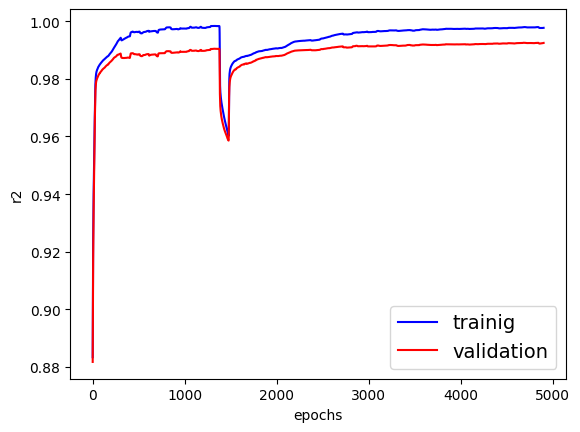

In [25]:
plt.plot(movingAvg(history_callback.history["coeff_determination"][:-1], 100), 'b-')
plt.plot(movingAvg(history_callback.history["val_coeff_determination"][:-1], 100), 'r-')
plt.rcParams.update({'font.size':14})
plt.xlabel(r'epochs')
plt.ylabel(r'r2')
plt.legend(['trainig', 'validation'])
#plt.ylim([0.5, 1.])
plt.savefig(f'./CNN_Results/CNN_M1_R2_{model.name}.png')

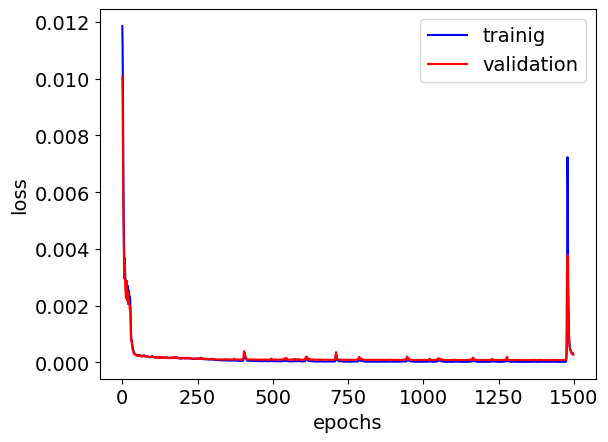

In [27]:
plt.plot(movingAvg(history_callback.history["loss"][:1500], 2), 'b-')
plt.plot(movingAvg(history_callback.history["val_loss"][:1500], 2), 'r-')
plt.rcParams.update({'font.size':14})
plt.xlabel(r'epochs')
plt.ylabel(r'loss')
plt.legend(['trainig', 'validation'])
#plt.ylim([0, 0.7])
plt.savefig(f'./CNN_Results/CNN_M1_Loss_{model.name}.png')

In [17]:
neuron = 256 #[32, 64, 128, 256]
layer = 5 #[2, 3, 4, 5]
model = Model(neuron, nx, ny, nf, nl, layer)
model.load_weights('/home/hmarefat/scratch/NECEC2023_local/CNN_checkpoints/M1_weight-4679.h5')

2023-10-15 12:04:19.759999: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38374 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


In [38]:
y_pred = model.predict(data[1:2,:,:,0:-1])

1/1 [==============================] - 0s 19ms/step


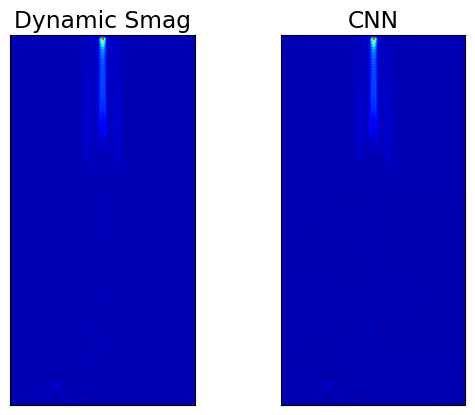

In [39]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(data[1,:,:,-1], cmap='jet')
plt.title('Dynamic Smag')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(1, 2, 2)
plt.imshow(y_pred[0,:,:,-1], cmap='jet')
plt.title('CNN')
plt.xticks([], [])
plt.yticks([], [])
plt.rcParams.update({'font.size':14})
plt.savefig(f'./CNN_Results/CNN_M1_CsSnapShot_{model.name}.png')

In [40]:
data[1,:,:,-1].shape, y_pred[0,:,:,-1].shape

((256, 128), (256, 128))

In [40]:
Cs_true = data[1,:,:,-1].reshape([data[1,:,:,-1].shape[0]*data[1,:,:,-1].shape[1],1])
Cs_pred = y_pred[0,:,:,-1].reshape([y_pred[0,:,:,-1].shape[0]*y_pred[0,:,:,-1].shape[1],1])

In [49]:
cc_train = CC(Cs_true, Cs_pred)
cc_train

<tf.Tensor: shape=(), dtype=float32, numpy=0.9998258>

In [41]:
Cs_true.shape, Cs_pred.shape

((32768, 1), (32768, 1))

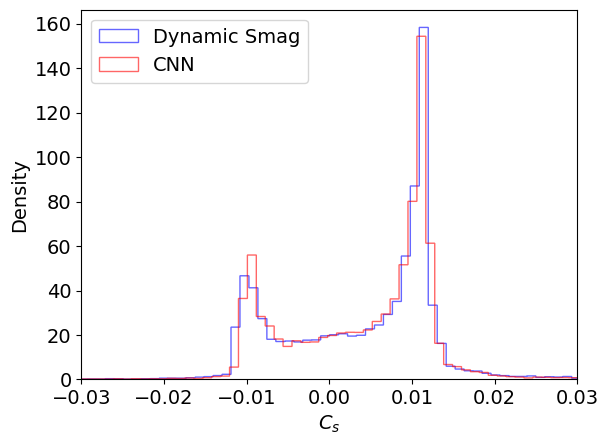

In [43]:
plt.hist(Cs_true, bins=8000, density=True, alpha=0.6, histtype=u'step', color='blue')
plt.hist(Cs_pred, bins=8000, density=True, alpha=0.6, histtype=u'step', color='red')
plt.legend(['Dynamic Smag', 'CNN'])
plt.xlabel(r'$C_s$')
plt.ylabel(r'Density')
#plt.title('Seen Data Comparison')
plt.xlim([-0.03,0.03])
plt.savefig(f'./CNN_Results/CNN_M1_SeenDensity_{model.name}.png')

In [44]:
y_test_pred = model.predict(np.expand_dims(data_test[1,:,:,0:-1], axis=0))

1/1 [==============================] - 0s 19ms/step


In [45]:
Cs_test_true = data_test[1,:,:,-1].reshape([data_test[1,:,:,-1].shape[0]*data_test[1,:,:,-1].shape[1],1])
Cs_test_pred = y_test_pred[0,:,:,-1].reshape([y_test_pred[0,:,:,-1].shape[0]*y_test_pred[0,:,:,-1].shape[1],1])

In [50]:
cc_test = CC(Cs_test_true, Cs_test_pred)
cc_test

<tf.Tensor: shape=(), dtype=float32, numpy=0.63145363>

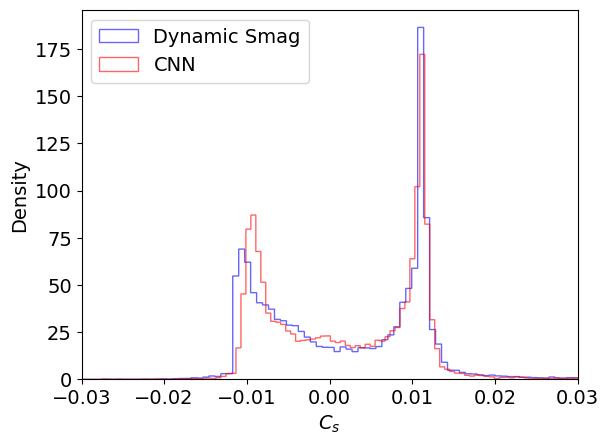

In [46]:
plt.hist(Cs_test_true, bins=2000, density=True, alpha=0.6, histtype=u'step', color='blue')
plt.hist(Cs_test_pred, bins=2000, density=True, alpha=0.6, histtype=u'step', color='red')
plt.legend(['Dynamic Smag', 'CNN'])
plt.xlabel(r'$C_s$')
plt.ylabel(r'Density')
#plt.title('Seen Data Comparison')
plt.xlim([-0.03,0.03])
plt.savefig(f'./CNN_Results/CNN_M1_UnSeenDensity_{model.name}.png')

In [21]:
!nvidia-smi

Mon Oct  2 08:04:42 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.10              Driver Version: 535.86.10    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:41:00.0 Off |                    0 |
| N/A   30C    P0              61W / 400W |  40136MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--